In [1]:
!pip install prophet

  Using cached prophet-1.1.4-py3-none-win_amd64.whl (12.9 MB)
  Using cached cmdstanpy-1.1.0-py3-none-any.whl (83 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
                                              0.0/695.7 kB ? eta -:--:--
     ------------                           225.3/695.7 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 695.7/695.7 kB 7.3 MB/s eta 0:00:00
  Using cached importlib_resources-6.0.0-py3-none-any.whl (31 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ephem-4.1.4-cp311-cp311-win_amd64.whl (1.4 MB)
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732051 sha256=6a0dd333890303ff4cf5c0a5dd4e93754dd6ea63baeb39ea19fb722998323e18
  Stored in directory: c:\users\halee\appdata\local\pip\cache\wheels\8f\bd\f9\5c4c39b529e0322b089

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error


from prophet import Prophet
from xgboost import XGBRegressor

In [4]:
pip install tensorflow


                                              0.0/276.6 MB ? eta -:--:--
                                              0.2/276.6 MB 4.6 MB/s eta 0:01:01
                                              0.8/276.6 MB 8.0 MB/s eta 0:00:35
                                             2.2/276.6 MB 15.7 MB/s eta 0:00:18
                                             3.8/276.6 MB 20.4 MB/s eta 0:00:14
                                             5.7/276.6 MB 24.2 MB/s eta 0:00:12
     -                                       7.5/276.6 MB 26.8 MB/s eta 0:00:11
     -                                       9.5/276.6 MB 29.0 MB/s eta 0:00:10
     -                                      11.6/276.6 MB 40.9 MB/s eta 0:00:07
     -                                      13.9/276.6 MB 43.5 MB/s eta 0:00:07
     --                                     16.3/276.6 MB 46.7 MB/s eta 0:00:06
     --                                     18.6/276.6 MB 46.9 MB/s eta 0:00:06
     --                                     21

In [5]:
import tensorflow as tf

In [6]:
import pandas as pd
import numpy as np


# Load the dataset using Vaex
df1 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2014.csv')

In [7]:
df2 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2015.csv')

In [8]:
df3 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2016.csv')

In [9]:
df4 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2017.csv')

In [10]:
df5 =  pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2018.csv')

In [11]:
df6 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2019.csv')

In [12]:
df7 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2020.csv')

In [13]:
df8 =pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2021.csv')

In [14]:
df9 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2022.csv')

In [17]:
df55= pd.read_csv('C:/Users/halee/Desktop/bWeatherEvents_Jan2016-Dec2022.csv')


In [300]:
df55

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627176,W-9091890,Snow,Light,2022-12-21 23:00:00,2022-12-21 23:42:00,0.01,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
8627177,W-9091891,Snow,Moderate,2022-12-21 23:42:00,2022-12-21 23:53:00,0.04,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
8627178,W-9091892,Cold,Severe,2022-12-21 23:53:00,2022-12-24 02:53:00,0.00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
8627179,W-9091893,Cold,Severe,2022-12-24 03:53:00,2022-12-24 07:53:00,0.00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0


In [21]:
# Convert run_start_time to datetime format
df1['run_start_time'] = pd.to_datetime(df1['run_start_time'])

# Set the run_start_time column as the DataFrame index
df1.set_index('run_start_time', inplace=True)

In [22]:
df1['hour'] = df1.index.strftime('%H:%M:%S')

In [26]:
df1['date'] = df1.index.date

df1

In [27]:
df1

,fips_code,county,state,sum,hour,date
run_start_time,,,,,,
2014-11-01 04:00:00,1037,Coosa,Alabama,12,04:00:00,2014-11-01
2014-11-01 04:00:00,1051,Elmore,Alabama,7,04:00:00,2014-11-01
2014-11-01 04:00:00,1109,Pike,Alabama,1,04:00:00,2014-11-01
2014-11-01 04:00:00,1121,Talladega,Alabama,31,04:00:00,2014-11-01
2014-11-01 04:00:00,4017,Navajo,Arizona,1,04:00:00,2014-11-01
...,...,...,...,...,...,...
2014-12-31 00:00:00,55029,Door,Wisconsin,1,00:00:00,2014-12-31
2014-12-31 00:00:00,55079,Milwaukee,Wisconsin,1,00:00:00,2014-12-31
2014-12-31 00:00:00,55093,Pierce,Wisconsin,6,00:00:00,2014-12-31


In [29]:
dallas_df = df1[(df1['fips_code'] == 48113) & (df1['county'] == 'Dallas')]

In [ ]:
hourly_data = df.groupby(['County', 'Date', 'Hour']).sum()

In [162]:
dallas_df

,fips_code,county,state,sum,hour,date,Hour
run_start_time,,,,,,,
2014-11-01 04:00:00,48113,Dallas,Texas,13,04:00:00,2014-11-01,4
2014-11-01 04:15:00,48113,Dallas,Texas,13,04:15:00,2014-11-01,4
2014-11-01 04:30:00,48113,Dallas,Texas,13,04:30:00,2014-11-01,4
2014-11-01 04:45:00,48113,Dallas,Texas,13,04:45:00,2014-11-01,4
2014-11-01 05:00:00,48113,Dallas,Texas,14,05:00:00,2014-11-01,5
...,...,...,...,...,...,...,...
2014-12-30 23:00:00,48113,Dallas,Texas,43,23:00:00,2014-12-30,23
2014-12-30 23:15:00,48113,Dallas,Texas,23,23:15:00,2014-12-30,23
2014-12-30 23:30:00,48113,Dallas,Texas,20,23:30:00,2014-12-30,23


In [163]:
dallas_df.reset_index()

,run_start_time,fips_code,county,state,sum,hour,date,Hour
0,2014-11-01 04:00:00,48113,Dallas,Texas,13,04:00:00,2014-11-01,4
1,2014-11-01 04:15:00,48113,Dallas,Texas,13,04:15:00,2014-11-01,4
2,2014-11-01 04:30:00,48113,Dallas,Texas,13,04:30:00,2014-11-01,4
3,2014-11-01 04:45:00,48113,Dallas,Texas,13,04:45:00,2014-11-01,4
4,2014-11-01 05:00:00,48113,Dallas,Texas,14,05:00:00,2014-11-01,5
...,...,...,...,...,...,...,...,...
5439,2014-12-30 23:00:00,48113,Dallas,Texas,43,23:00:00,2014-12-30,23
5440,2014-12-30 23:15:00,48113,Dallas,Texas,23,23:15:00,2014-12-30,23
5441,2014-12-30 23:30:00,48113,Dallas,Texas,20,23:30:00,2014-12-30,23
5442,2014-12-30 23:45:00,48113,Dallas,Texas,20,23:45:00,2014-12-30,23


In [164]:
dallas_df

,fips_code,county,state,sum,hour,date,Hour
run_start_time,,,,,,,
2014-11-01 04:00:00,48113,Dallas,Texas,13,04:00:00,2014-11-01,4
2014-11-01 04:15:00,48113,Dallas,Texas,13,04:15:00,2014-11-01,4
2014-11-01 04:30:00,48113,Dallas,Texas,13,04:30:00,2014-11-01,4
2014-11-01 04:45:00,48113,Dallas,Texas,13,04:45:00,2014-11-01,4
2014-11-01 05:00:00,48113,Dallas,Texas,14,05:00:00,2014-11-01,5
...,...,...,...,...,...,...,...
2014-12-30 23:00:00,48113,Dallas,Texas,43,23:00:00,2014-12-30,23
2014-12-30 23:15:00,48113,Dallas,Texas,23,23:15:00,2014-12-30,23
2014-12-30 23:30:00,48113,Dallas,Texas,20,23:30:00,2014-12-30,23


In [165]:
dallas_df

,fips_code,county,state,sum,hour,date,Hour
run_start_time,,,,,,,
2014-11-01 04:00:00,48113,Dallas,Texas,13,04:00:00,2014-11-01,4
2014-11-01 04:15:00,48113,Dallas,Texas,13,04:15:00,2014-11-01,4
2014-11-01 04:30:00,48113,Dallas,Texas,13,04:30:00,2014-11-01,4
2014-11-01 04:45:00,48113,Dallas,Texas,13,04:45:00,2014-11-01,4
2014-11-01 05:00:00,48113,Dallas,Texas,14,05:00:00,2014-11-01,5
...,...,...,...,...,...,...,...
2014-12-30 23:00:00,48113,Dallas,Texas,43,23:00:00,2014-12-30,23
2014-12-30 23:15:00,48113,Dallas,Texas,23,23:15:00,2014-12-30,23
2014-12-30 23:30:00,48113,Dallas,Texas,20,23:30:00,2014-12-30,23


In [166]:
# Group the data by date and hour and calculate the sum for each group
grouped_df = dallas_df.groupby([dallas_df.index.date, dallas_df['Hour']])['sum'].sum()

In [167]:
grouped_df.head()

            Hour
2014-11-01  4        52
            5        54
            6       153
            7       480
            8       668
Name: sum, dtype: int64

In [168]:
dallas_df

,fips_code,county,state,sum,hour,date,Hour
run_start_time,,,,,,,
2014-11-01 04:00:00,48113,Dallas,Texas,13,04:00:00,2014-11-01,4
2014-11-01 04:15:00,48113,Dallas,Texas,13,04:15:00,2014-11-01,4
2014-11-01 04:30:00,48113,Dallas,Texas,13,04:30:00,2014-11-01,4
2014-11-01 04:45:00,48113,Dallas,Texas,13,04:45:00,2014-11-01,4
2014-11-01 05:00:00,48113,Dallas,Texas,14,05:00:00,2014-11-01,5
...,...,...,...,...,...,...,...
2014-12-30 23:00:00,48113,Dallas,Texas,43,23:00:00,2014-12-30,23
2014-12-30 23:15:00,48113,Dallas,Texas,23,23:15:00,2014-12-30,23
2014-12-30 23:30:00,48113,Dallas,Texas,20,23:30:00,2014-12-30,23


In [169]:
hourly_sum_df = dallas_df.resample('H').sum(numeric_only=True)

In [170]:
hourly_sum_df

,fips_code,sum,Hour
run_start_time,,,
2014-11-01 04:00:00,192452,52,16
2014-11-01 05:00:00,192452,54,20
2014-11-01 06:00:00,192452,153,24
2014-11-01 07:00:00,192452,480,28
2014-11-01 08:00:00,192452,668,32
...,...,...,...
2014-12-30 20:00:00,192452,255,80
2014-12-30 21:00:00,192452,215,84
2014-12-30 22:00:00,192452,99,88


In [76]:
c


In [172]:
hourly_sum_df

,fips_code,sum,Hour
run_start_time,,,
2014-11-01 04:00:00,192452,52,16
2014-11-01 05:00:00,192452,54,20
2014-11-01 06:00:00,192452,153,24
2014-11-01 07:00:00,192452,480,28
2014-11-01 08:00:00,192452,668,32
...,...,...,...
2014-12-30 20:00:00,192452,255,80
2014-12-30 21:00:00,192452,215,84
2014-12-30 22:00:00,192452,99,88


In [174]:
hourly_sum_df.drop(columns=['fips_code','Hour'], inplace=True)

In [176]:
hourly_sum_df.reset_index()

,run_start_time,sum
0,2014-11-01 04:00:00,52
1,2014-11-01 05:00:00,54
2,2014-11-01 06:00:00,153
3,2014-11-01 07:00:00,480
4,2014-11-01 08:00:00,668
...,...,...
1432,2014-12-30 20:00:00,255
1433,2014-12-30 21:00:00,215
1434,2014-12-30 22:00:00,99
1435,2014-12-30 23:00:00,106


In [177]:
hourly_sum_df = hourly_sum_df.rename(columns={'sum': 'hourly_sum'})

In [80]:
# Convert run_start_time to datetime format
hourly_sum_df['run_start_time'] = pd.to_datetime(hourly_sum_df['run_start_time'])

# Set the run_start_time column as the DataFrame index
hourly_sum_df.set_index('run_start_time', inplace=True)

In [ ]:
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

In [179]:
hourly_sum_df

,hourly_sum
run_start_time,
2014-11-01 04:00:00,52
2014-11-01 05:00:00,54
2014-11-01 06:00:00,153
2014-11-01 07:00:00,480
2014-11-01 08:00:00,668
...,...
2014-12-30 20:00:00,255
2014-12-30 21:00:00,215
2014-12-30 22:00:00,99


In [181]:
hourly_sum_df=hourly_sum_df.reset_index()


In [182]:
hourly_sum_df

,run_start_time,hourly_sum
0,2014-11-01 04:00:00,52
1,2014-11-01 05:00:00,54
2,2014-11-01 06:00:00,153
3,2014-11-01 07:00:00,480
4,2014-11-01 08:00:00,668
...,...,...
1432,2014-12-30 20:00:00,255
1433,2014-12-30 21:00:00,215
1434,2014-12-30 22:00:00,99
1435,2014-12-30 23:00:00,106


Text(0.5, 1.0, 'Power Outages by Hour')

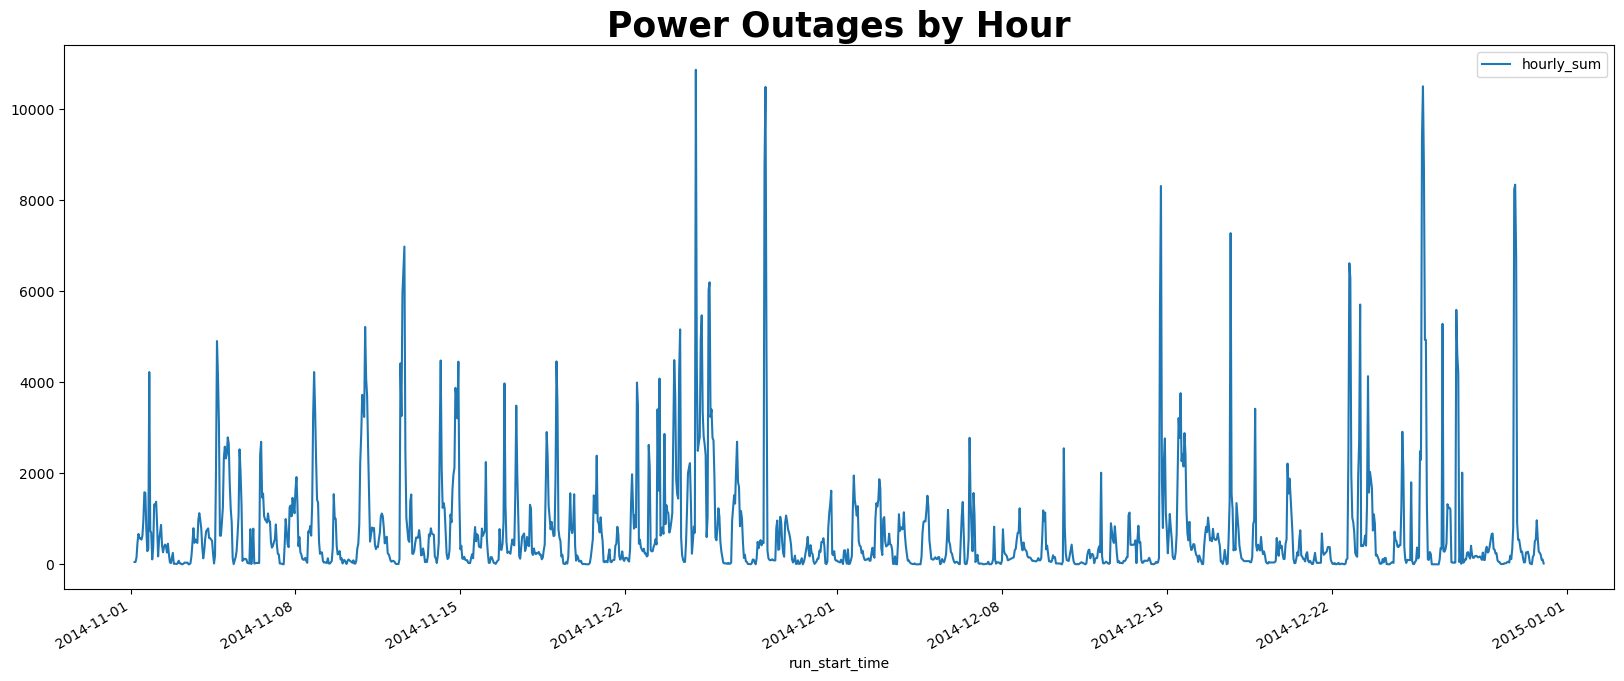

In [83]:

hourly_sum_df.plot(figsize=(20,8))
plt.title('Power Outages by Hour', weight='bold', fontsize=25)

In [84]:
dallas_df2 = df2[(df2['fips_code'] == 48113) & (df2['county'] == 'Dallas')]

In [85]:
dallas_df2

,fips_code,county,state,sum,run_start_time
195,48113,Dallas,Texas,72,2015-01-01 00:00:00
435,48113,Dallas,Texas,72,2015-01-01 00:15:00
677,48113,Dallas,Texas,72,2015-01-01 00:30:00
919,48113,Dallas,Texas,71,2015-01-01 00:45:00
1157,48113,Dallas,Texas,71,2015-01-01 01:00:00
...,...,...,...,...,...
7285418,48113,Dallas,Texas,84,2015-08-01 02:45:00
7285800,48113,Dallas,Texas,50,2015-08-01 03:00:00
7286175,48113,Dallas,Texas,52,2015-08-01 03:15:00
7286540,48113,Dallas,Texas,49,2015-08-01 03:30:00


In [89]:
dallas_df2

,fips_code,county,state,sum
run_start_time,,,,
2015-01-01 00:00:00,48113,Dallas,Texas,72
2015-01-01 00:15:00,48113,Dallas,Texas,72
2015-01-01 00:30:00,48113,Dallas,Texas,72
2015-01-01 00:45:00,48113,Dallas,Texas,71
2015-01-01 01:00:00,48113,Dallas,Texas,71
...,...,...,...,...
2015-08-01 02:45:00,48113,Dallas,Texas,84
2015-08-01 03:00:00,48113,Dallas,Texas,50
2015-08-01 03:15:00,48113,Dallas,Texas,52


In [94]:
dallas_df2

,fips_code,county,state,sum,date,hour
run_start_time,,,,,,
2015-01-01 00:00:00,48113,Dallas,Texas,72,2015-01-01,0
2015-01-01 00:15:00,48113,Dallas,Texas,72,2015-01-01,0
2015-01-01 00:30:00,48113,Dallas,Texas,72,2015-01-01,0
2015-01-01 00:45:00,48113,Dallas,Texas,71,2015-01-01,0
2015-01-01 01:00:00,48113,Dallas,Texas,71,2015-01-01,1
...,...,...,...,...,...,...
2015-08-01 02:45:00,48113,Dallas,Texas,84,2015-08-01,2
2015-08-01 03:00:00,48113,Dallas,Texas,50,2015-08-01,3
2015-08-01 03:15:00,48113,Dallas,Texas,52,2015-08-01,3


In [95]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df2 = dallas_df2.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df2 = hourly_sum_df2.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df2 = hourly_sum_df2.rename(columns={'sum': 'hourly_sum'})

In [96]:
hourly_sum_df2

,county,run_start_time,fips_code,hourly_sum,hour
0,Dallas,2015-01-01 00:00:00,192452,287,0
1,Dallas,2015-01-01 01:00:00,192452,279,4
2,Dallas,2015-01-01 02:00:00,192452,271,8
3,Dallas,2015-01-01 03:00:00,192452,238,12
4,Dallas,2015-01-01 04:00:00,192452,336,16
...,...,...,...,...,...
4941,Dallas,2015-07-31 23:00:00,192452,404,92
4942,Dallas,2015-08-01 00:00:00,192452,391,0
4943,Dallas,2015-08-01 01:00:00,192452,407,4
4944,Dallas,2015-08-01 02:00:00,192452,346,8


In [97]:
hourly_sum_df2

,county,run_start_time,fips_code,hourly_sum,hour
0,Dallas,2015-01-01 00:00:00,192452,287,0
1,Dallas,2015-01-01 01:00:00,192452,279,4
2,Dallas,2015-01-01 02:00:00,192452,271,8
3,Dallas,2015-01-01 03:00:00,192452,238,12
4,Dallas,2015-01-01 04:00:00,192452,336,16
...,...,...,...,...,...
4941,Dallas,2015-07-31 23:00:00,192452,404,92
4942,Dallas,2015-08-01 00:00:00,192452,391,0
4943,Dallas,2015-08-01 01:00:00,192452,407,4
4944,Dallas,2015-08-01 02:00:00,192452,346,8


In [99]:
hourly_sum_df2.drop(columns=['county','fips_code','hour'], inplace=True)

In [100]:
hourly_sum_df2

,run_start_time,hourly_sum
0,2015-01-01 00:00:00,287
1,2015-01-01 01:00:00,279
2,2015-01-01 02:00:00,271
3,2015-01-01 03:00:00,238
4,2015-01-01 04:00:00,336
...,...,...
4941,2015-07-31 23:00:00,404
4942,2015-08-01 00:00:00,391
4943,2015-08-01 01:00:00,407
4944,2015-08-01 02:00:00,346


In [101]:
dallas_df3 = df3[(df3['fips_code'] == 48113) & (df3['county'] == 'Dallas')]

In [102]:
dallas_df3

,fips_code,county,state,sum,run_start_time
12338404,48113,Dallas,Texas,1,2016-11-29 14:15:00
12338999,48113,Dallas,Texas,1,2016-11-29 14:30:00
12340250,48113,Dallas,Texas,1,2016-11-29 15:00:00
12340901,48113,Dallas,Texas,1,2016-11-29 15:15:00
12811126,48113,Dallas,Texas,1,2016-12-14 23:15:00
12811440,48113,Dallas,Texas,1,2016-12-14 23:30:00
12811752,48113,Dallas,Texas,1,2016-12-14 23:45:00


In [103]:
# Convert run_start_time to datetime format
dallas_df3['run_start_time'] = pd.to_datetime(dallas_df3['run_start_time'])

# Set the run_start_time column as the DataFrame index
dallas_df3.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_22748\1098141277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dallas_df3['run_start_time'] = pd.to_datetime(dallas_df3['run_start_time'])


In [104]:
dallas_df3

,fips_code,county,state,sum
run_start_time,,,,
2016-11-29 14:15:00,48113,Dallas,Texas,1
2016-11-29 14:30:00,48113,Dallas,Texas,1
2016-11-29 15:00:00,48113,Dallas,Texas,1
2016-11-29 15:15:00,48113,Dallas,Texas,1
2016-12-14 23:15:00,48113,Dallas,Texas,1
2016-12-14 23:30:00,48113,Dallas,Texas,1
2016-12-14 23:45:00,48113,Dallas,Texas,1


In [106]:
dallas_df3['date'] = dallas_df3.index.date
dallas_df3['hour'] = dallas_df3.index.hour

C:\Users\halee\AppData\Local\Temp\ipykernel_22748\1003394402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dallas_df3['date'] = dallas_df3.index.date
C:\Users\halee\AppData\Local\Temp\ipykernel_22748\1003394402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dallas_df3['hour'] = dallas_df3.index.hour


In [107]:
dallas_df3

,fips_code,county,state,sum,date,hour
run_start_time,,,,,,
2016-11-29 14:15:00,48113,Dallas,Texas,1,2016-11-29,14
2016-11-29 14:30:00,48113,Dallas,Texas,1,2016-11-29,14
2016-11-29 15:00:00,48113,Dallas,Texas,1,2016-11-29,15
2016-11-29 15:15:00,48113,Dallas,Texas,1,2016-11-29,15
2016-12-14 23:15:00,48113,Dallas,Texas,1,2016-12-14,23
2016-12-14 23:30:00,48113,Dallas,Texas,1,2016-12-14,23
2016-12-14 23:45:00,48113,Dallas,Texas,1,2016-12-14,23


In [108]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df3 = dallas_df3.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df3 = hourly_sum_df3.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df3 = hourly_sum_df3.rename(columns={'sum': 'hourly_sum'})

In [109]:
hourly_sum_df3

,county,run_start_time,fips_code,hourly_sum,hour
0,Dallas,2016-11-29 14:00:00,96226,2,28
1,Dallas,2016-11-29 15:00:00,96226,2,30
2,Dallas,2016-12-14 23:00:00,144339,3,69


In [110]:
hourly_sum_df3.drop(columns=['county','fips_code','hour'], inplace=True)

In [111]:
hourly_sum_df3

,run_start_time,hourly_sum
0,2016-11-29 14:00:00,2
1,2016-11-29 15:00:00,2
2,2016-12-14 23:00:00,3


In [112]:
dallas_df4 = df4[(df4['fips_code'] == 48113) & (df4['county'] == 'Dallas')]

In [115]:
dallas_df4

,fips_code,county,state,sum,run_start_time
32678,48113,Dallas,Texas,538.0,2017-01-02 12:00:00
33189,48113,Dallas,Texas,538.0,2017-01-02 12:30:00
37160,48113,Dallas,Texas,1.0,2017-01-02 15:15:00
37606,48113,Dallas,Texas,1.0,2017-01-02 15:30:00
38063,48113,Dallas,Texas,1.0,2017-01-02 15:45:00
...,...,...,...,...,...
15076652,48113,Dallas,Texas,433.0,2017-12-30 23:00:00
15077070,48113,Dallas,Texas,433.0,2017-12-30 23:15:00
15077477,48113,Dallas,Texas,410.0,2017-12-30 23:30:00
15077883,48113,Dallas,Texas,1782.0,2017-12-30 23:45:00


In [116]:
# Convert run_start_time to datetime format
dallas_df4['run_start_time'] = pd.to_datetime(dallas_df4['run_start_time'])

# Set the run_start_time column as the DataFrame index
dallas_df4.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_22748\3287090651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dallas_df4['run_start_time'] = pd.to_datetime(dallas_df4['run_start_time'])


In [117]:
dallas_df4

,fips_code,county,state,sum
run_start_time,,,,
2017-01-02 12:00:00,48113,Dallas,Texas,538.0
2017-01-02 12:30:00,48113,Dallas,Texas,538.0
2017-01-02 15:15:00,48113,Dallas,Texas,1.0
2017-01-02 15:30:00,48113,Dallas,Texas,1.0
2017-01-02 15:45:00,48113,Dallas,Texas,1.0
...,...,...,...,...
2017-12-30 23:00:00,48113,Dallas,Texas,433.0
2017-12-30 23:15:00,48113,Dallas,Texas,433.0
2017-12-30 23:30:00,48113,Dallas,Texas,410.0


In [118]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df4 = dallas_df4.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df4 = hourly_sum_df4.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df4 = hourly_sum_df4.rename(columns={'sum': 'hourly_sum'})

In [119]:
hourly_sum_df4

,county,run_start_time,fips_code,hourly_sum
0,Dallas,2017-01-02 12:00:00,96226,1076.0
1,Dallas,2017-01-02 15:00:00,144339,3.0
2,Dallas,2017-01-02 16:00:00,144339,4.0
3,Dallas,2017-01-09 20:00:00,48113,7.0
4,Dallas,2017-01-11 22:00:00,192452,34.0
...,...,...,...,...
1012,Dallas,2017-12-30 20:00:00,144339,331.0
1013,Dallas,2017-12-30 21:00:00,192452,296.0
1014,Dallas,2017-12-30 22:00:00,192452,232.0
1015,Dallas,2017-12-30 23:00:00,192452,3058.0


In [121]:
hourly_sum_df4.drop(columns=['county','fips_code'], inplace=True)

In [122]:
hourly_sum_df4

,run_start_time,hourly_sum
0,2017-01-02 12:00:00,1076.0
1,2017-01-02 15:00:00,3.0
2,2017-01-02 16:00:00,4.0
3,2017-01-09 20:00:00,7.0
4,2017-01-11 22:00:00,34.0
...,...,...
1012,2017-12-30 20:00:00,331.0
1013,2017-12-30 21:00:00,296.0
1014,2017-12-30 22:00:00,232.0
1015,2017-12-30 23:00:00,3058.0


In [123]:
dallas_df5 = df5[(df5['fips_code'] == 48113) & (df5['county'] == 'Dallas')]

In [124]:
dallas_df5

,fips_code,county,state,sum,run_start_time
358,48113,Dallas,Texas,577.0,2018-01-01 00:00:00
791,48113,Dallas,Texas,654.0,2018-01-01 00:15:00
1224,48113,Dallas,Texas,658.0,2018-01-01 00:30:00
1655,48113,Dallas,Texas,805.0,2018-01-01 00:45:00
2084,48113,Dallas,Texas,672.0,2018-01-01 01:00:00
...,...,...,...,...,...
21774648,48113,Dallas,Texas,5.0,2018-12-30 23:00:00
21775177,48113,Dallas,Texas,5.0,2018-12-30 23:15:00
21775702,48113,Dallas,Texas,22.0,2018-12-30 23:30:00
21776222,48113,Dallas,Texas,23.0,2018-12-30 23:45:00


In [125]:
# Convert run_start_time to datetime format
dallas_df5['run_start_time'] = pd.to_datetime(dallas_df5['run_start_time'])

# Set the run_start_time column as the DataFrame index
dallas_df5.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_22748\2631770408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dallas_df5['run_start_time'] = pd.to_datetime(dallas_df5['run_start_time'])


In [126]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df5 = dallas_df5.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df5 = hourly_sum_df5.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df5 = hourly_sum_df5.rename(columns={'sum': 'hourly_sum'})

In [127]:
hourly_sum_df5

,county,run_start_time,fips_code,hourly_sum
0,Dallas,2018-01-01 00:00:00,192452,2694.0
1,Dallas,2018-01-01 01:00:00,192452,2977.0
2,Dallas,2018-01-01 02:00:00,192452,1243.0
3,Dallas,2018-01-01 03:00:00,192452,1408.0
4,Dallas,2018-01-01 04:00:00,192452,8613.0
...,...,...,...,...
8604,Dallas,2018-12-30 20:00:00,192452,57.0
8605,Dallas,2018-12-30 21:00:00,192452,56.0
8606,Dallas,2018-12-30 22:00:00,192452,117.0
8607,Dallas,2018-12-30 23:00:00,192452,55.0


In [128]:
hourly_sum_df5.drop(columns=['county','fips_code'], inplace=True)

In [129]:
hourly_sum_df5

,run_start_time,hourly_sum
0,2018-01-01 00:00:00,2694.0
1,2018-01-01 01:00:00,2977.0
2,2018-01-01 02:00:00,1243.0
3,2018-01-01 03:00:00,1408.0
4,2018-01-01 04:00:00,8613.0
...,...,...
8604,2018-12-30 20:00:00,57.0
8605,2018-12-30 21:00:00,56.0
8606,2018-12-30 22:00:00,117.0
8607,2018-12-30 23:00:00,55.0


In [130]:
dallas_df6 = df6[(df6['fips_code'] == 48113) & (df6['county'] == 'Dallas')]

In [131]:
dallas_df6

,fips_code,county,state,sum,run_start_time
636,48113,Dallas,Texas,105.0,2019-01-01 00:00:00
1342,48113,Dallas,Texas,1122.0,2019-01-01 00:15:00
2072,48113,Dallas,Texas,1128.0,2019-01-01 00:30:00
2796,48113,Dallas,Texas,1602.0,2019-01-01 00:45:00
3493,48113,Dallas,Texas,283.0,2019-01-01 01:00:00
...,...,...,...,...,...
24070195,48113,Dallas,Texas,41.0,2019-12-30 23:00:00
24071151,48113,Dallas,Texas,43.0,2019-12-30 23:15:00
24072090,48113,Dallas,Texas,38.0,2019-12-30 23:30:00
24073031,48113,Dallas,Texas,22.0,2019-12-30 23:45:00


In [132]:
# Convert run_start_time to datetime format
dallas_df6['run_start_time'] = pd.to_datetime(dallas_df6['run_start_time'])

# Set the run_start_time column as the DataFrame index
dallas_df6.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_22748\3573390032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dallas_df6['run_start_time'] = pd.to_datetime(dallas_df6['run_start_time'])


In [133]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df6 = dallas_df6.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df6 = hourly_sum_df6.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df6 = hourly_sum_df6.rename(columns={'sum': 'hourly_sum'})

In [134]:
hourly_sum_df6

,county,run_start_time,fips_code,hourly_sum
0,Dallas,2019-01-01 00:00:00,192452,3957.0
1,Dallas,2019-01-01 01:00:00,192452,615.0
2,Dallas,2019-01-01 02:00:00,192452,218.0
3,Dallas,2019-01-01 03:00:00,192452,1622.0
4,Dallas,2019-01-01 04:00:00,192452,481.0
...,...,...,...,...
8634,Dallas,2019-12-30 20:00:00,192452,290.0
8635,Dallas,2019-12-30 21:00:00,192452,144.0
8636,Dallas,2019-12-30 22:00:00,192452,79.0
8637,Dallas,2019-12-30 23:00:00,192452,144.0


In [135]:
hourly_sum_df6.drop(columns=['county','fips_code'], inplace=True)

In [136]:
hourly_sum_df6

,run_start_time,hourly_sum
0,2019-01-01 00:00:00,3957.0
1,2019-01-01 01:00:00,615.0
2,2019-01-01 02:00:00,218.0
3,2019-01-01 03:00:00,1622.0
4,2019-01-01 04:00:00,481.0
...,...,...
8634,2019-12-30 20:00:00,290.0
8635,2019-12-30 21:00:00,144.0
8636,2019-12-30 22:00:00,79.0
8637,2019-12-30 23:00:00,144.0


In [137]:
dallas_df7 = df7[(df7['fips_code'] == 48113) & (df7['county'] == 'Dallas')]

In [138]:
dallas_df7

,fips_code,county,state,sum,run_start_time
647,48113,Dallas,Texas,8.0,2020-01-01 00:00:00
1394,48113,Dallas,Texas,172.0,2020-01-01 00:15:00
2115,48113,Dallas,Texas,174.0,2020-01-01 00:30:00
2827,48113,Dallas,Texas,175.0,2020-01-01 00:45:00
3503,48113,Dallas,Texas,175.0,2020-01-01 01:00:00
...,...,...,...,...,...
25542924,48113,Dallas,Texas,214.0,2020-12-30 23:00:00
25543543,48113,Dallas,Texas,175.0,2020-12-30 23:15:00
25544153,48113,Dallas,Texas,176.0,2020-12-30 23:30:00
25544750,48113,Dallas,Texas,191.0,2020-12-30 23:45:00


In [139]:
# Convert run_start_time to datetime format
dallas_df7['run_start_time'] = pd.to_datetime(dallas_df7['run_start_time'])

# Set the run_start_time column as the DataFrame index
dallas_df7.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_22748\3220307207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dallas_df7['run_start_time'] = pd.to_datetime(dallas_df7['run_start_time'])


In [140]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df7 = dallas_df7.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df7 = hourly_sum_df7.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df7 = hourly_sum_df7.rename(columns={'sum': 'hourly_sum'})

In [141]:
hourly_sum_df7

,county,run_start_time,fips_code,hourly_sum
0,Dallas,2020-01-01 00:00:00,192452,529.0
1,Dallas,2020-01-01 01:00:00,192452,696.0
2,Dallas,2020-01-01 02:00:00,192452,53.0
3,Dallas,2020-01-01 03:00:00,192452,106.0
4,Dallas,2020-01-01 04:00:00,192452,86.0
...,...,...,...,...
8632,Dallas,2020-12-30 20:00:00,192452,1707.0
8633,Dallas,2020-12-30 21:00:00,192452,821.0
8634,Dallas,2020-12-30 22:00:00,192452,900.0
8635,Dallas,2020-12-30 23:00:00,192452,756.0


In [143]:
hourly_sum_df7.drop(columns=['county','fips_code'], inplace=True)

In [144]:
hourly_sum_df7

,run_start_time,hourly_sum
0,2020-01-01 00:00:00,529.0
1,2020-01-01 01:00:00,696.0
2,2020-01-01 02:00:00,53.0
3,2020-01-01 03:00:00,106.0
4,2020-01-01 04:00:00,86.0
...,...,...
8632,2020-12-30 20:00:00,1707.0
8633,2020-12-30 21:00:00,821.0
8634,2020-12-30 22:00:00,900.0
8635,2020-12-30 23:00:00,756.0


In [145]:
dallas_df8 = df8[(df8['fips_code'] == 48113) & (df8['county'] == 'Dallas')]

In [146]:
dallas_df8

,fips_code,county,state,sum,run_start_time
464,48113,Dallas,Texas,1923.0,2021-01-01 00:00:00
974,48113,Dallas,Texas,2273.0,2021-01-01 00:15:00
1465,48113,Dallas,Texas,2242.0,2021-01-01 00:30:00
1951,48113,Dallas,Texas,2270.0,2021-01-01 00:45:00
2450,48113,Dallas,Texas,2330.0,2021-01-01 01:00:00
...,...,...,...,...,...
24823430,48113,Dallas,Texas,23.0,2021-12-30 23:00:00
24824059,48113,Dallas,Texas,22.0,2021-12-30 23:15:00
24824680,48113,Dallas,Texas,21.0,2021-12-30 23:30:00
24825379,48113,Dallas,Texas,21.0,2021-12-30 23:45:00


In [147]:
# Convert run_start_time to datetime format
dallas_df8['run_start_time'] = pd.to_datetime(dallas_df8['run_start_time'])

# Set the run_start_time column as the DataFrame index
dallas_df8.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_22748\1588469268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dallas_df8['run_start_time'] = pd.to_datetime(dallas_df8['run_start_time'])


In [148]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df8 = dallas_df8.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df8 = hourly_sum_df8.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df8 = hourly_sum_df8.rename(columns={'sum': 'hourly_sum'})

In [149]:
hourly_sum_df8

,county,run_start_time,fips_code,hourly_sum
0,Dallas,2021-01-01 00:00:00,192452,8708.0
1,Dallas,2021-01-01 01:00:00,192452,9266.0
2,Dallas,2021-01-01 02:00:00,192452,10043.0
3,Dallas,2021-01-01 03:00:00,192452,3000.0
4,Dallas,2021-01-01 04:00:00,192452,1337.0
...,...,...,...,...
8675,Dallas,2021-12-30 20:00:00,192452,97.0
8676,Dallas,2021-12-30 21:00:00,192452,143.0
8677,Dallas,2021-12-30 22:00:00,192452,96.0
8678,Dallas,2021-12-30 23:00:00,192452,87.0


In [150]:
hourly_sum_df8.drop(columns=['county','fips_code'], inplace=True)

In [151]:
hourly_sum_df8

,run_start_time,hourly_sum
0,2021-01-01 00:00:00,8708.0
1,2021-01-01 01:00:00,9266.0
2,2021-01-01 02:00:00,10043.0
3,2021-01-01 03:00:00,3000.0
4,2021-01-01 04:00:00,1337.0
...,...,...
8675,2021-12-30 20:00:00,97.0
8676,2021-12-30 21:00:00,143.0
8677,2021-12-30 22:00:00,96.0
8678,2021-12-30 23:00:00,87.0


In [152]:
dallas_df9 = df9[(df9['fips_code'] == 48113) & (df9['county'] == 'Dallas')]

In [153]:
dallas_df9

,fips_code,county,state,sum,run_start_time
433,48113,Dallas,Texas,10.0,2022-01-01 00:00:00
961,48113,Dallas,Texas,9.0,2022-01-01 00:15:00
1485,48113,Dallas,Texas,8.0,2022-01-01 00:30:00
2007,48113,Dallas,Texas,37.0,2022-01-01 00:45:00
2530,48113,Dallas,Texas,37.0,2022-01-01 01:00:00
...,...,...,...,...,...
22323645,48113,Dallas,Texas,253.0,2022-11-12 17:30:00
22324637,48113,Dallas,Texas,232.0,2022-11-12 17:45:00
22325613,48113,Dallas,Texas,231.0,2022-11-12 18:00:00
22326667,48113,Dallas,Texas,232.0,2022-11-12 18:15:00


In [154]:
# Convert run_start_time to datetime format
dallas_df9['run_start_time'] = pd.to_datetime(dallas_df9['run_start_time'])

# Set the run_start_time column as the DataFrame index
dallas_df9.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_22748\3505052069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dallas_df9['run_start_time'] = pd.to_datetime(dallas_df9['run_start_time'])


In [155]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df9 = dallas_df9.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df9 = hourly_sum_df9.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df9 = hourly_sum_df9.rename(columns={'sum': 'hourly_sum'})

In [156]:
hourly_sum_df9

,county,run_start_time,fips_code,hourly_sum
0,Dallas,2022-01-01 00:00:00,192452,64.0
1,Dallas,2022-01-01 01:00:00,192452,114.0
2,Dallas,2022-01-01 02:00:00,192452,59.0
3,Dallas,2022-01-01 03:00:00,192452,4.0
4,Dallas,2022-01-01 04:00:00,144339,26.0
...,...,...,...,...
7527,Dallas,2022-11-12 14:00:00,192452,557.0
7528,Dallas,2022-11-12 15:00:00,192452,1117.0
7529,Dallas,2022-11-12 16:00:00,192452,1068.0
7530,Dallas,2022-11-12 17:00:00,192452,1040.0


In [157]:
hourly_sum_df9.drop(columns=['county','fips_code'], inplace=True)

In [158]:
hourly_sum_df9

,run_start_time,hourly_sum
0,2022-01-01 00:00:00,64.0
1,2022-01-01 01:00:00,114.0
2,2022-01-01 02:00:00,59.0
3,2022-01-01 03:00:00,4.0
4,2022-01-01 04:00:00,26.0
...,...,...
7527,2022-11-12 14:00:00,557.0
7528,2022-11-12 15:00:00,1117.0
7529,2022-11-12 16:00:00,1068.0
7530,2022-11-12 17:00:00,1040.0


In [192]:
df_final = pd.concat([hourly_sum_df,hourly_sum_df2, hourly_sum_df3, hourly_sum_df4, hourly_sum_df5, hourly_sum_df6, hourly_sum_df7, hourly_sum_df8, hourly_sum_df9])

In [193]:
df_final

,run_start_time,hourly_sum
0,2014-11-01 04:00:00,52.0
1,2014-11-01 05:00:00,54.0
2,2014-11-01 06:00:00,153.0
3,2014-11-01 07:00:00,480.0
4,2014-11-01 08:00:00,668.0
...,...,...
7527,2022-11-12 14:00:00,557.0
7528,2022-11-12 15:00:00,1117.0
7529,2022-11-12 16:00:00,1068.0
7530,2022-11-12 17:00:00,1040.0


In [194]:
# Convert run_start_time to datetime format
df_final['run_start_time'] = pd.to_datetime(df_final['run_start_time'])

# Set the run_start_time column as the DataFrame index
df_final.set_index('run_start_time', inplace=True)

In [195]:
df_final

,hourly_sum
run_start_time,
2014-11-01 04:00:00,52.0
2014-11-01 05:00:00,54.0
2014-11-01 06:00:00,153.0
2014-11-01 07:00:00,480.0
2014-11-01 08:00:00,668.0
...,...
2022-11-12 14:00:00,557.0
2022-11-12 15:00:00,1117.0
2022-11-12 16:00:00,1068.0


Text(0.5, 1.0, 'outage from 2018-01-01 to 2018-01-08')

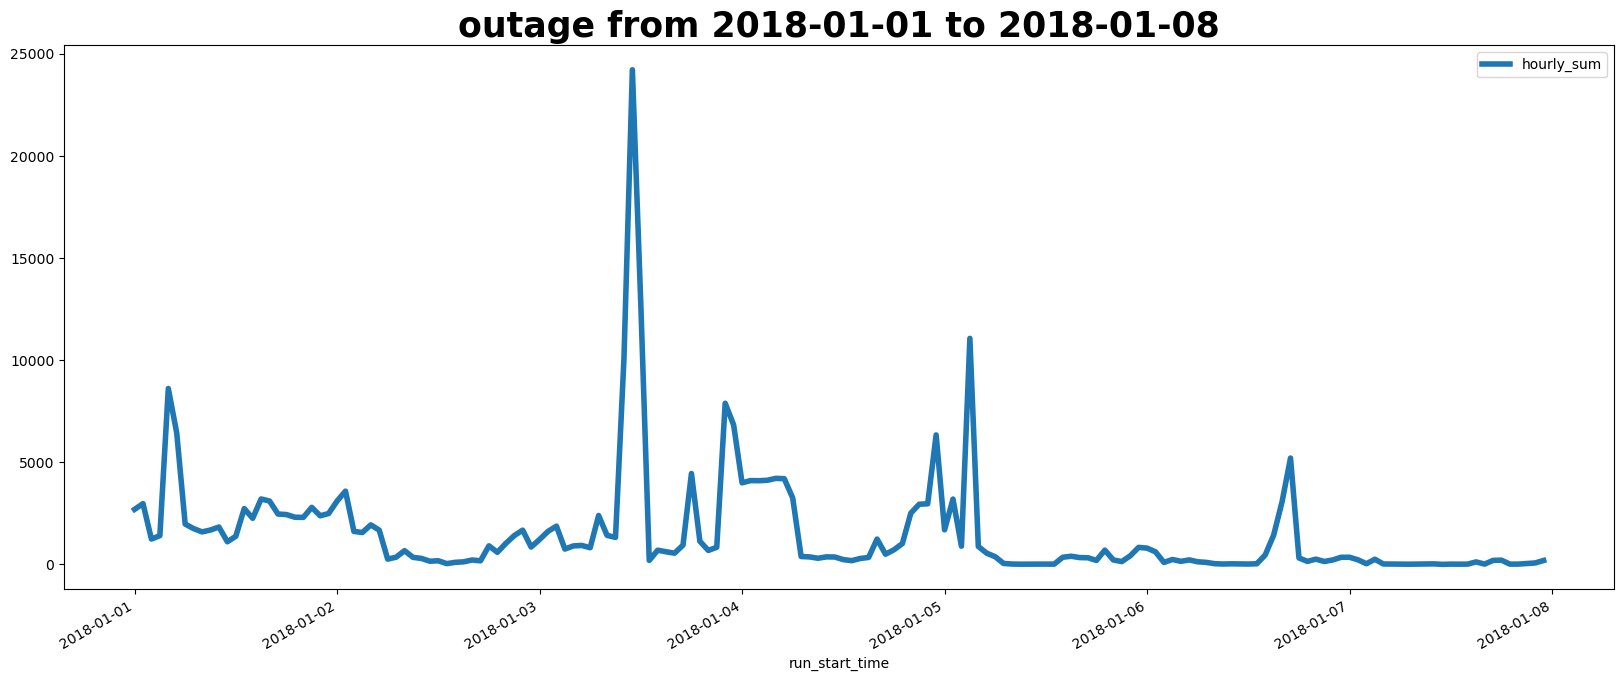

In [197]:
df_2018 = df_final[(df_final.index >= '2018-01-01') & (df_final.index < '2018-01-08')]

df_2018.plot(figsize=(20,8), lw=4)
plt.title('outage from 2018-01-01 to 2018-01-08', weight='bold', fontsize=25)

In [200]:
df = df_final.sort_index()

In [201]:
df.head()

,hourly_sum
run_start_time,
2014-11-01 04:00:00,52.0
2014-11-01 05:00:00,54.0
2014-11-01 06:00:00,153.0
2014-11-01 07:00:00,480.0
2014-11-01 08:00:00,668.0


In [211]:
df

,hourly_sum
run_start_time,
2014-11-01 04:00:00,52.0
2014-11-01 05:00:00,54.0
2014-11-01 06:00:00,153.0
2014-11-01 07:00:00,480.0
2014-11-01 08:00:00,668.0
...,...
2022-11-12 14:00:00,557.0
2022-11-12 15:00:00,1117.0
2022-11-12 16:00:00,1068.0


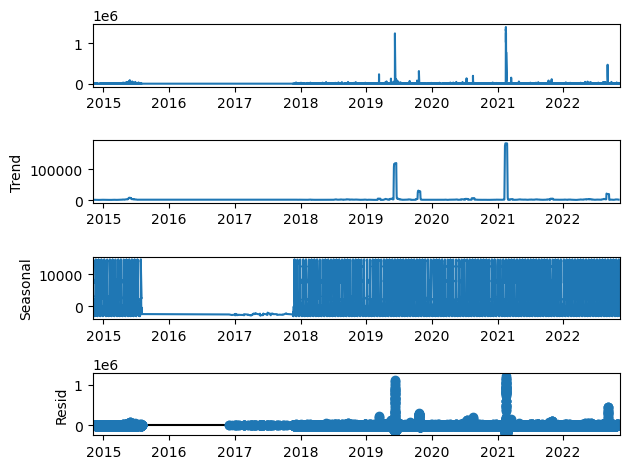

In [202]:
seasonal_decompose(df, period=365).plot()
plt.show()

In [203]:
# Daily Consumption
ma = df.resample('D').mean()

# 3 Day Example
ma['Moving Average'] = ma['hourly_sum'].rolling(3).mean()
ma.head()

,hourly_sum,Moving Average
run_start_time,,
2014-11-01,770.150000,NaN
2014-11-02,437.750000,NaN
2014-11-03,286.375000,498.091667
2014-11-04,1127.333333,617.152778
2014-11-05,1063.166667,825.625000


In [204]:
ma

,hourly_sum,Moving Average
run_start_time,,
2014-11-01,770.150000,NaN
2014-11-02,437.750000,NaN
2014-11-03,286.375000,498.091667
2014-11-04,1127.333333,617.152778
2014-11-05,1063.166667,825.625000
...,...,...
2022-11-08,841.875000,853.638889
2022-11-09,326.208333,730.722222
2022-11-10,330.833333,499.638889


In [205]:
def moving_average(data, window):
    data['Moving Average'] = data['hourly_sum'].rolling(window).mean()
    actual = data['hourly_sum'][-(window+30):]
    ma = data['Moving Average'][-(window+30):]
    
    plt.figure(figsize=(20,8))
    actual.plot(label='Actual', lw=4)
    ma.plot(label='MA-{}'.format(str(window)), ls='--', lw=2)
    plt.title('{}-Days Moving Average'.format(str(window)), weight='bold', fontsize=25)
    plt.legend()

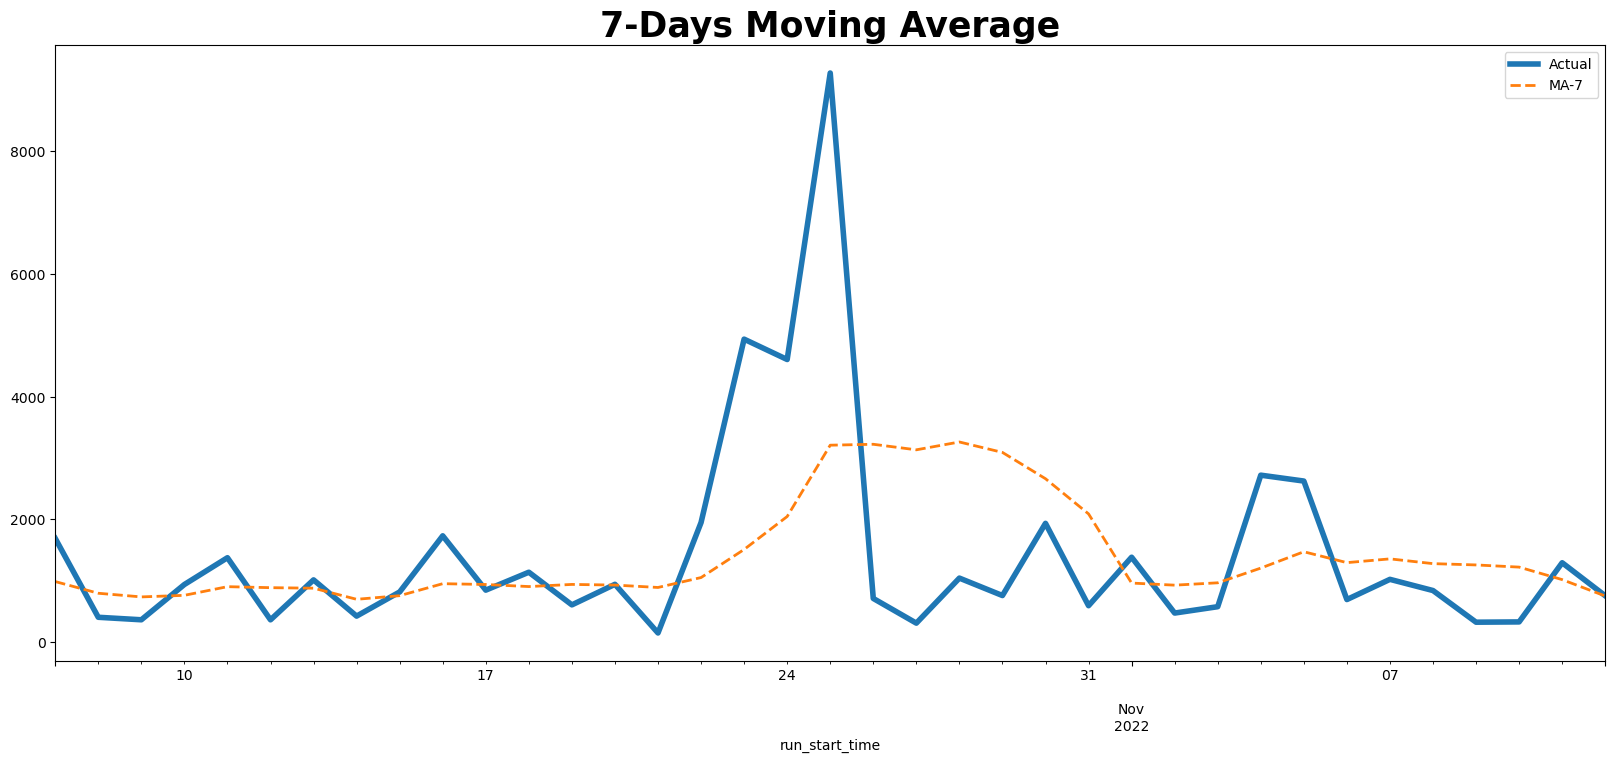

In [206]:
moving_average(ma, 7)

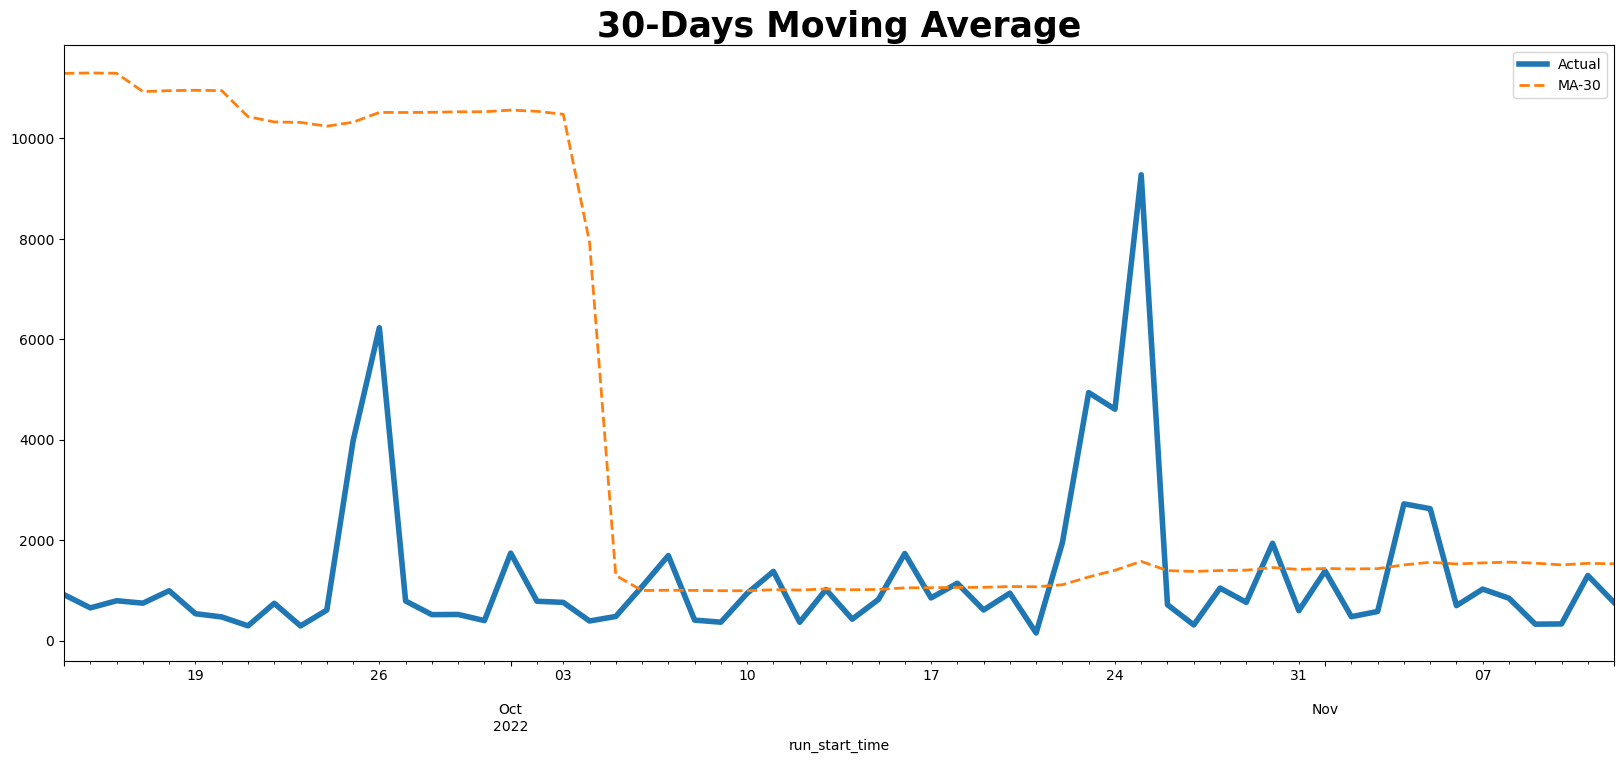

In [207]:
moving_average(ma, 30)

In [208]:
# Before building and training our model, let's split the data into training and testing
df_train, df_test = df[df.index < '2016-01-01'], df[df.index >= '2016-01-01']

print('Train:\t', len(df_train))
print('Test:\t', len(df_test))

Train:	 6383
Test:	 43117


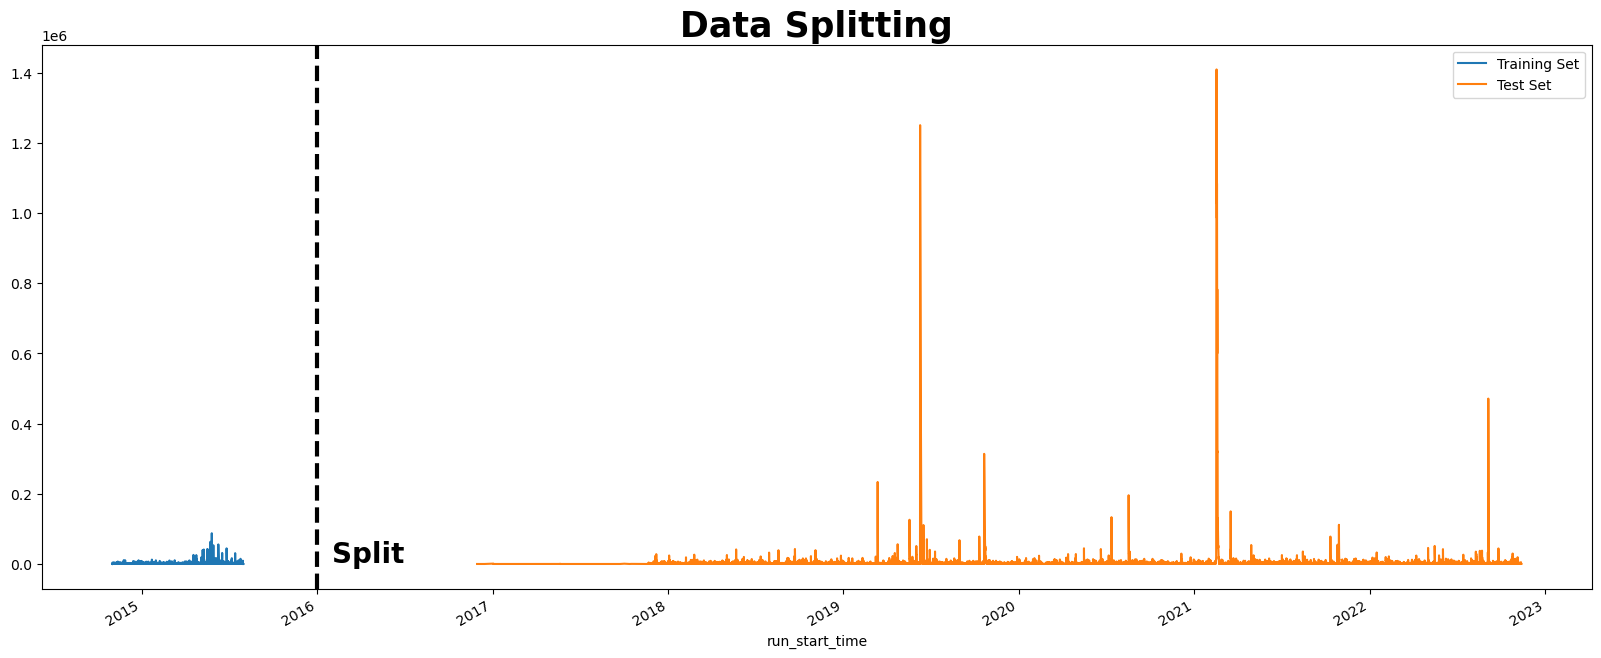

In [210]:
plt.figure(figsize=(20,8))

df_train['hourly_sum'].plot(label='Training Set')
df_test['hourly_sum'].plot(label='Test Set')
plt.axvline('2016-01-01', color='black', ls='--', lw=3)
plt.text('2016-02-01', 3700, 'Split', fontsize=20, fontweight='bold')
plt.title('Data Splitting', weight='bold', fontsize=25)
plt.legend()

In [ ]:
#prophet model

In [213]:
def index_to_column(data):
    data = data.reset_index()
    data['run_start_time'] = pd.to_datetime(data['run_start_time'])
    data = data.sort_values('run_start_time')
    data=data.rename(columns={'run_start_time':'ds','hourly_sum': 'y'})
    return data

In [214]:
prophet_train = index_to_column(df_train)
prophet_test = index_to_column(df_test)

In [215]:
prophet_model = Prophet(interval_width=0.95)

prophet_model.fit(prophet_train)
prophet_pred = prophet_model.predict(prophet_test[['ds']]) # Keep the dataset format

17:32:16 - cmdstanpy - INFO - Chain [1] start processing
17:32:17 - cmdstanpy - INFO - Chain [1] done processing


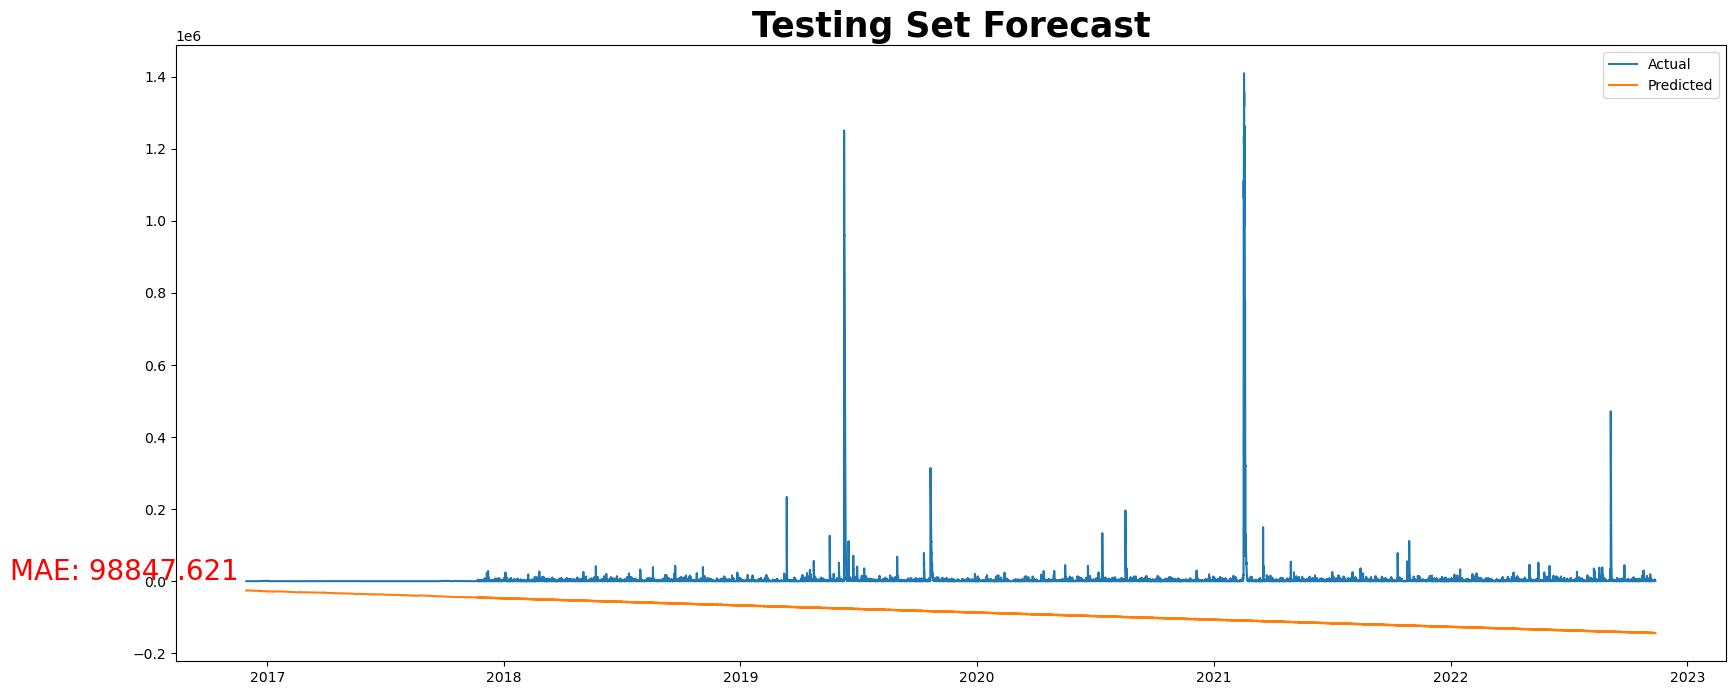

In [216]:
mae = round(mean_absolute_error(prophet_test['y'], prophet_pred['yhat']), 3)

plt.figure(figsize=(20,8))
plt.plot(prophet_test['ds'], prophet_test['y'], label='Actual')
plt.plot(prophet_pred['ds'], prophet_pred['yhat'], label='Predicted')
plt.title('Test Forecasting', weight='bold', fontsize=40)
plt.text(16770, 3250, 'MAE: {}'.format(mae), fontsize=20, color='red')
plt.title('Testing Set Forecast', weight='bold', fontsize=25)
plt.legend()

In [217]:
# This time, we will use all data (train and test) to train our model
new_df = index_to_column(df)

In [218]:
prophet_model2 = Prophet(interval_width=0.95)
prophet_model2.fit(new_df)
# 7 days to the future (7x24 = 168)
future_dates = prophet_model2.make_future_dataframe(periods=168, freq='H')
prophet_pred2 = prophet_model2.predict(future_dates)

17:33:40 - cmdstanpy - INFO - Chain [1] start processing
17:34:13 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 2000x800 with 0 Axes>

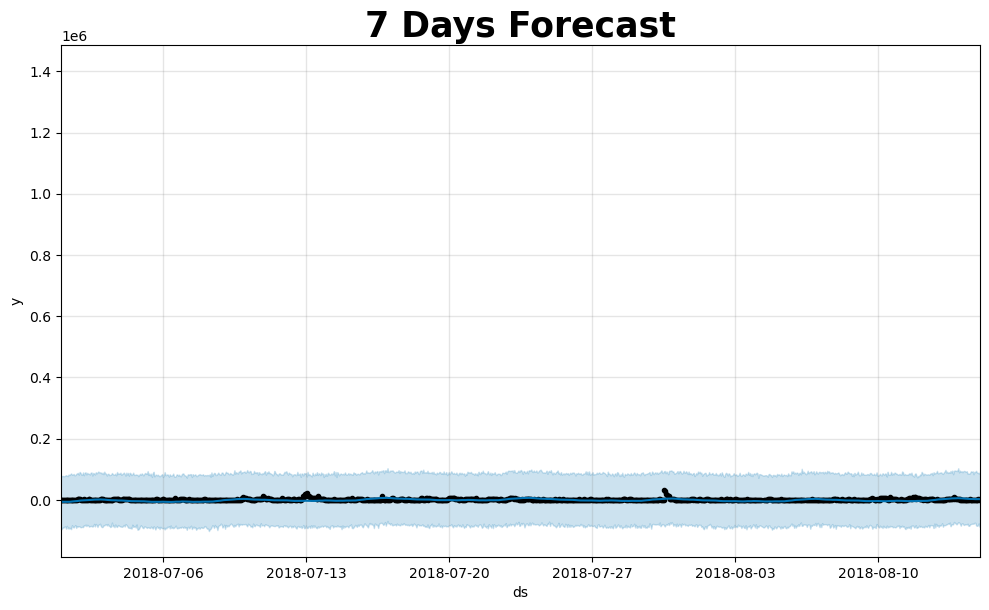

In [219]:
plt.figure(figsize=(20,8))

fig = prophet_model2.plot(prophet_pred2, uncertainty=True)
ax = fig.gca()
ax.set_xlim(pd.to_datetime(['2018-07-01', '2018-08-15']))
plt.title('7 Days Forecast', weight='bold', fontsize=25)
plt.show()

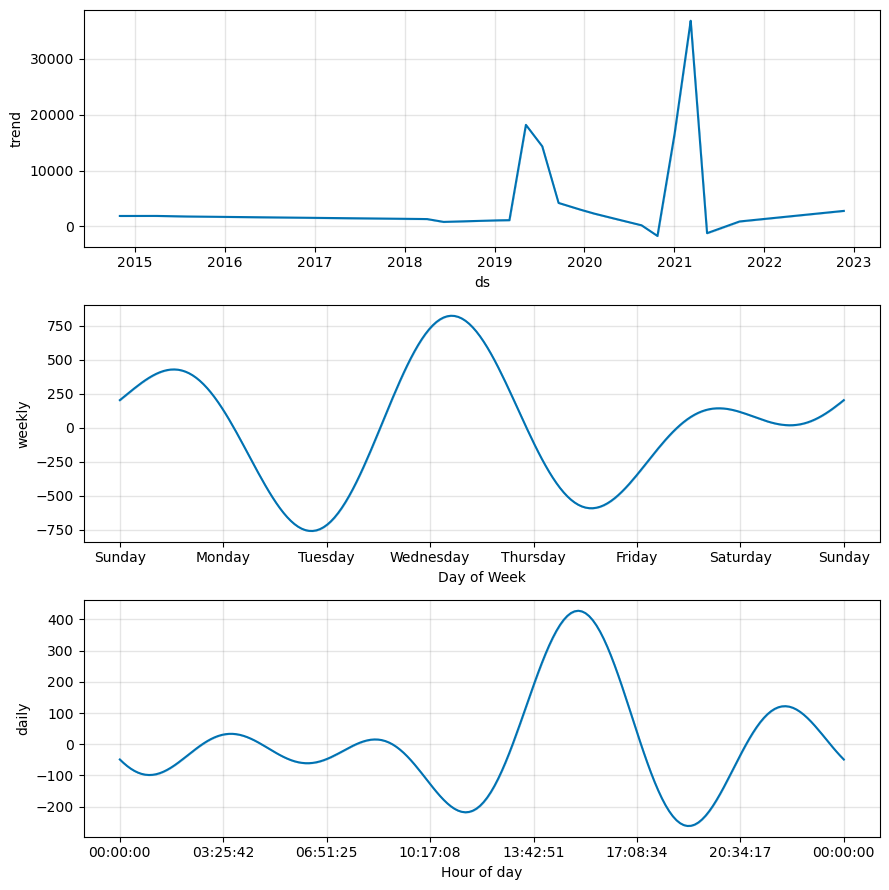

In [220]:
prophet_model.plot_components(prophet_pred2)
plt.show()

<Figure size 2000x800 with 0 Axes>

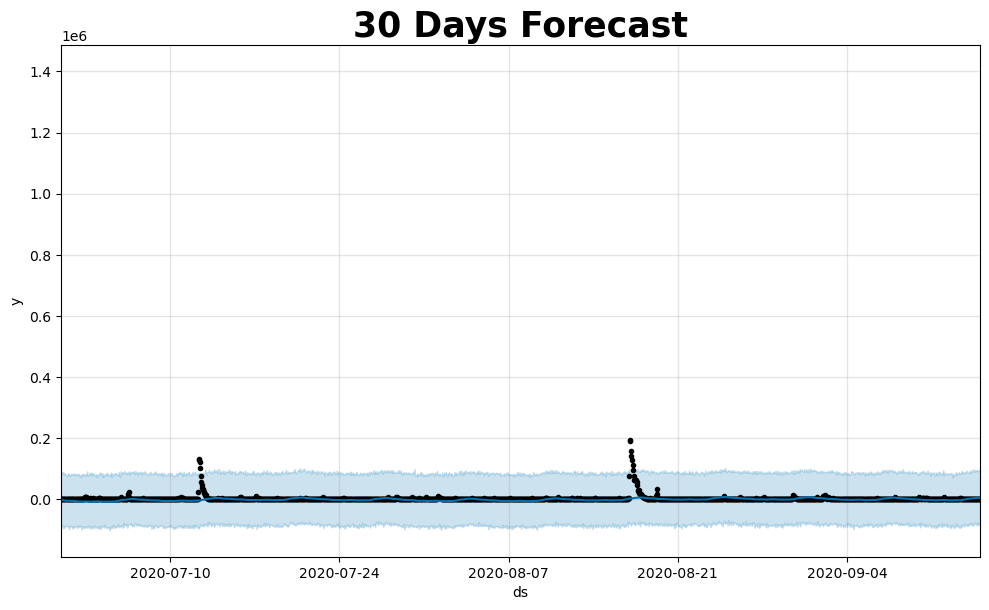

In [231]:
future_dates2 = prophet_model2.make_future_dataframe(periods=720, freq='H')
prophet_pred3 = prophet_model2.predict(future_dates2)

plt.figure(figsize=(20,8))

fig = prophet_model2.plot(prophet_pred3, uncertainty=True)
ax = fig.gca()
ax.set_xlim(pd.to_datetime(['2020-07-01', '2020-09-15']))
plt.title('30 Days Forecast', weight='bold', fontsize=25)
plt.show()

In [ ]:
#xgboost

In [232]:
def date_transform(data):
    df = data.copy()
    
    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.dayofweek
    df['Dayofmonth'] = df.index.day
    df['Dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.weekofyear
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year
    
    X = df.drop('hourly_sum', axis=1)
    y = df['hourly_sum']
    
    return X, y

In [233]:
X_train, y_train = date_transform(df_train)
X_test, y_test = date_transform(df_test)

C:\Users\halee\AppData\Local\Temp\ipykernel_22748\922682596.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = df.index.weekofyear
C:\Users\halee\AppData\Local\Temp\ipykernel_22748\922682596.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = df.index.weekofyear


In [234]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=10)
xgb_model.fit(X_train, y_train, eval_metric='mae', eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_pred = xgb_model.predict(X_test)

[0]	validation_0-mae:1393.51033	validation_1-mae:4210.43993
[1]	validation_0-mae:1337.42711	validation_1-mae:4188.12200
[2]	validation_0-mae:1291.02420	validation_1-mae:4175.47802
[3]	validation_0-mae:1252.17523	validation_1-mae:4169.66293
[4]	validation_0-mae:1218.36573	validation_1-mae:4166.69882
[5]	validation_0-mae:1192.47126	validation_1-mae:4170.22037
[6]	validation_0-mae:1174.96239	validation_1-mae:4173.83218
[7]	validation_0-mae:1157.79466	validation_1-mae:4179.98755
[8]	validation_0-mae:1148.05912	validation_1-mae:4188.60899
[9]	validation_0-mae:1137.73517	validation_1-mae:4197.67550
[10]	validation_0-mae:1127.66775	validation_1-mae:4210.74460
[11]	validation_0-mae:1122.92158	validation_1-mae:4220.77119
[12]	validation_0-mae:1114.76294	validation_1-mae:4231.18142
[13]	validation_0-mae:1103.47611	validation_1-mae:4242.06588
[14]	validation_0-mae:1096.70035	validation_1-mae:4254.24792


C:\Users\halee\anaconda\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


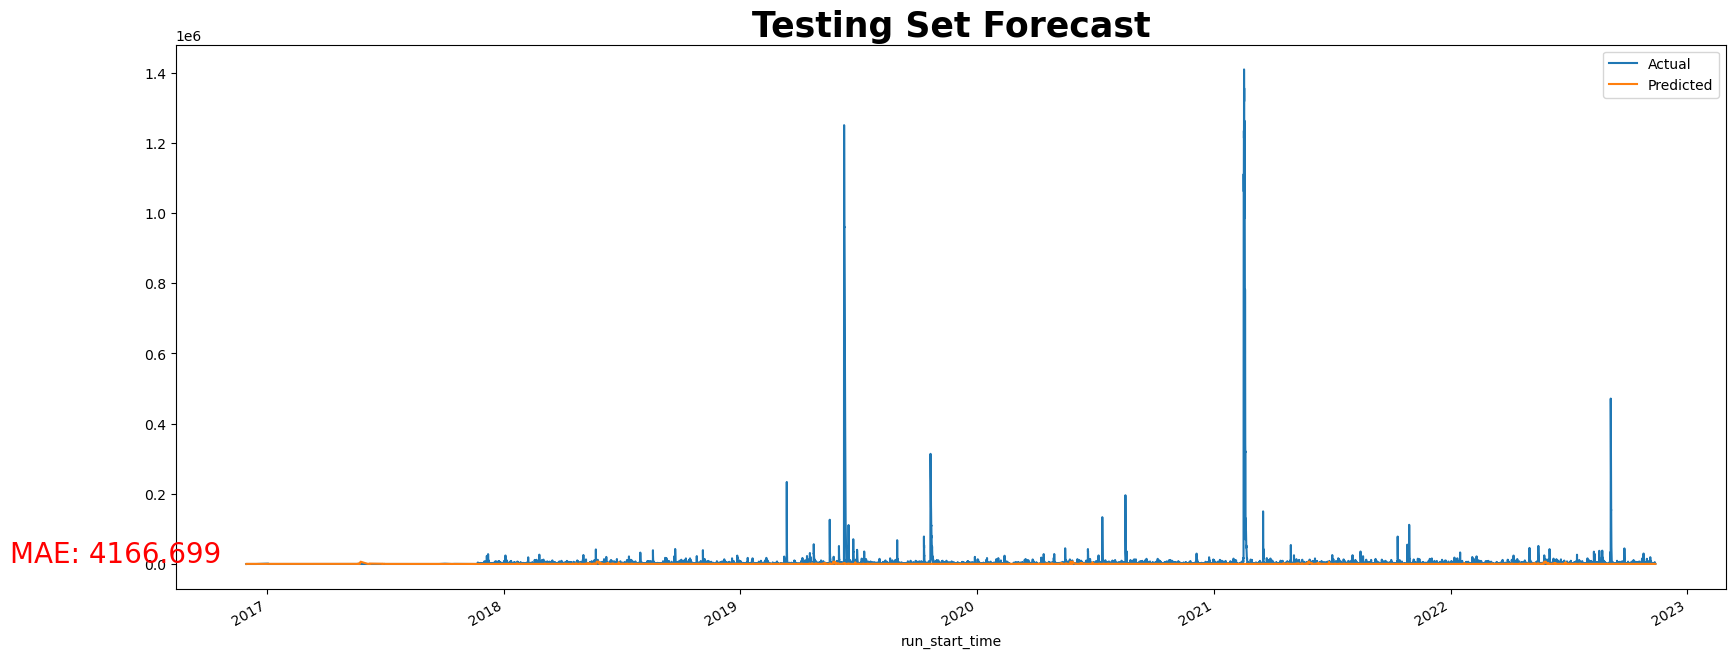

In [235]:
mae = round(mean_absolute_error(y_test, xgb_pred), 3)

df_plot = pd.DataFrame({'y_test':y_test, 'xgb_pred':xgb_pred})

plt.figure(figsize=(20,8))

df_plot['y_test'].plot(label='Actual')
df_plot['xgb_pred'].plot(label='Predicted')
plt.text(16770, 3250, 'MAE: {}'.format(mae), fontsize=20, color='red')
plt.title('Testing Set Forecast', weight='bold', fontsize=25)
plt.legend()
plt.show()

In [236]:
future_dates2 = future_dates.iloc[-168:, :].copy()

future_dates2['ds'] = pd.to_datetime(future_dates2['ds'])
future_dates2 = future_dates2.set_index('ds')

future_dates2['Hour'] = future_dates2.index.hour
future_dates2['Dayofweek'] = future_dates2.index.dayofweek
future_dates2['Dayofmonth'] = future_dates2.index.day
future_dates2['Dayofyear'] = future_dates2.index.dayofyear
future_dates2['weekofyear'] = future_dates2.index.weekofyear
future_dates2['Month'] = future_dates2.index.month
future_dates2['Quarter'] = future_dates2.index.quarter
future_dates2['Year'] = future_dates2.index.year

C:\Users\halee\AppData\Local\Temp\ipykernel_22748\77699731.py:10: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  future_dates2['weekofyear'] = future_dates2.index.weekofyear


In [237]:
X = pd.concat([X_train, X_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)

In [238]:
xgb_model2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model2.fit(X, y, eval_metric='mae')
xgb_pred2 = xgb_model2.predict(future_dates2)

C:\Users\halee\anaconda\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


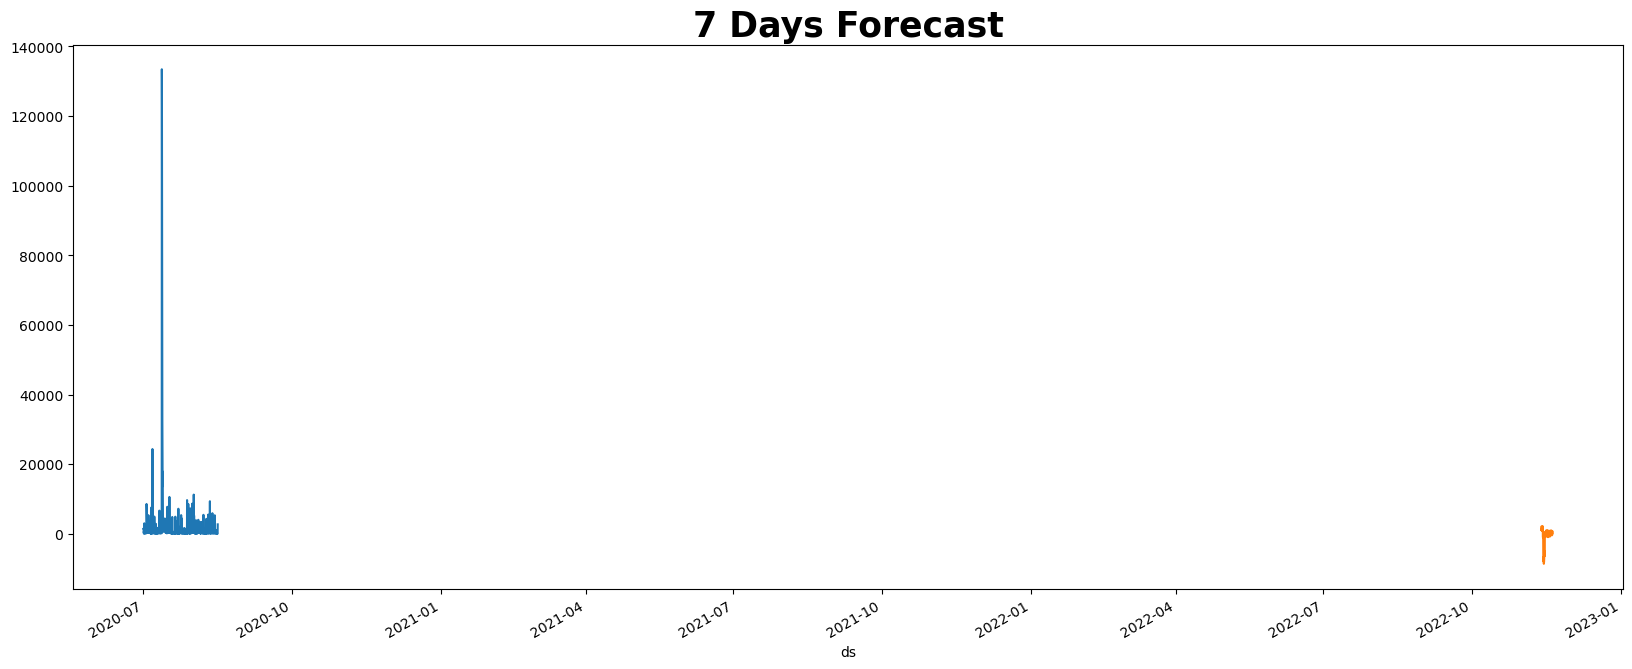

In [239]:
df_plot2 = pd.DataFrame({'Hour':future_dates2['Hour'], 'xgb_pred2':xgb_pred2})

last_week = df['2020-07-01':'2020-08-15']

plt.figure(figsize=(20,8))

last_week['hourly_sum'].plot()
df_plot2['xgb_pred2'].plot()
plt.title('7 Days Forecast', weight='bold', fontsize=25)
plt.show()

C:\Users\halee\AppData\Local\Temp\ipykernel_22748\528936822.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  future_dates3['weekofyear'] = future_dates3.index.weekofyear
C:\Users\halee\anaconda\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


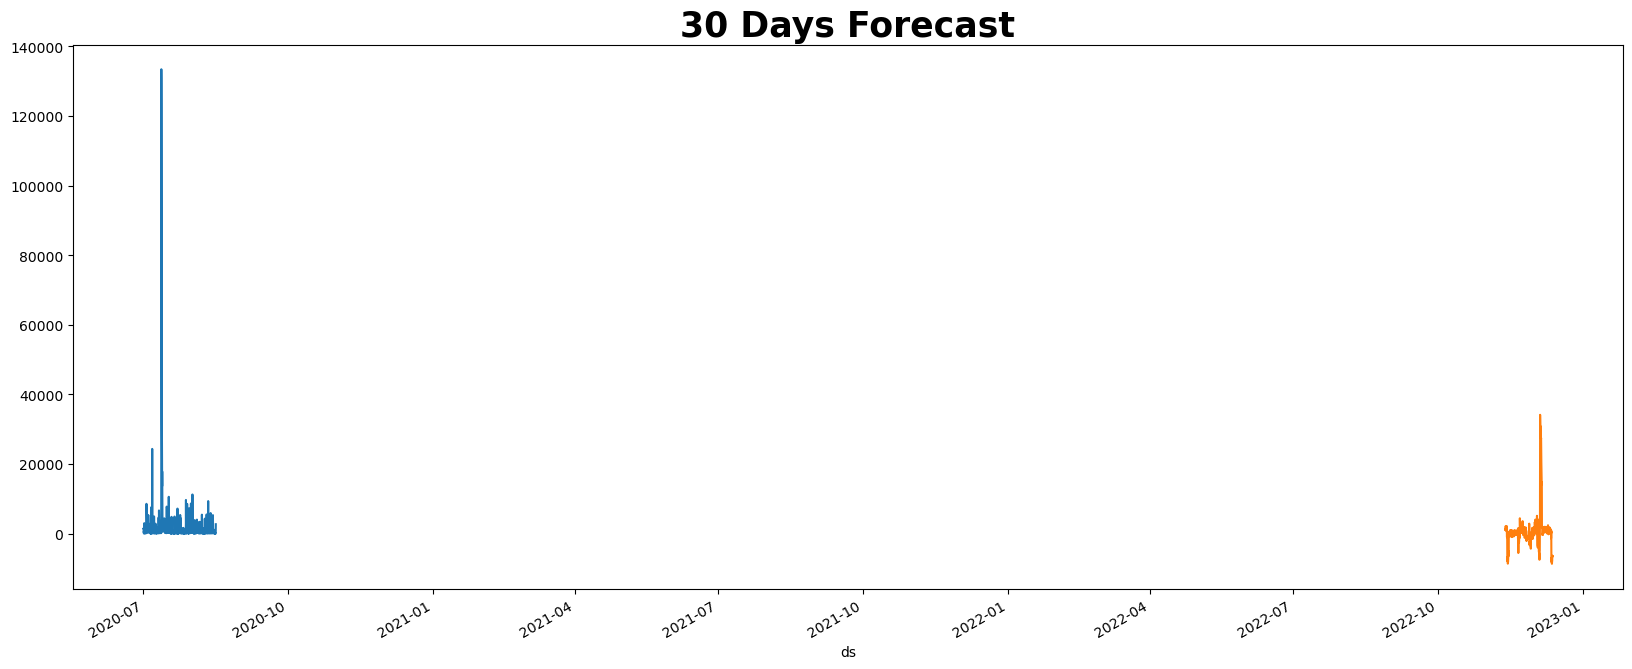

In [241]:

a = prophet_model2.make_future_dataframe(periods=720, freq='H')
future_dates3 = a.iloc[-720:, :].copy()

future_dates3['ds'] = pd.to_datetime(future_dates3['ds'])
future_dates3 = future_dates3.set_index('ds')

future_dates3['Hour'] = future_dates3.index.hour
future_dates3['Dayofweek'] = future_dates3.index.dayofweek
future_dates3['Dayofmonth'] = future_dates3.index.day
future_dates3['Dayofyear'] = future_dates3.index.dayofyear
future_dates3['weekofyear'] = future_dates3.index.weekofyear
future_dates3['Month'] = future_dates3.index.month
future_dates3['Quarter'] = future_dates3.index.quarter
future_dates3['Year'] = future_dates3.index.year

Xx = pd.concat([X_train, X_test], ignore_index=True)
yy = pd.concat([y_train, y_test], ignore_index=True)

xgb_model3 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model3.fit(Xx, yy, eval_metric='mae')
xgb_pred3 = xgb_model3.predict(future_dates3)

df_plot3 = pd.DataFrame({'Hour':future_dates3['Hour'], 'xgb_pred2':xgb_pred3})

last_week3 = df['2020-07-01':'2020-08-15']

plt.figure(figsize=(20,8))

last_week3['hourly_sum'].plot()
df_plot3['xgb_pred2'].plot()
plt.title('30 Days Forecast', weight='bold', fontsize=25)
plt.show()

In [ ]:
#deep learning model

In [242]:
# EXAMPLE

dataset = tf.expand_dims(df_train['hourly_sum'].head(10), axis=-1)

# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.from_tensor_slices(dataset)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# # Shuffle the windows
# dataset = dataset.shuffle(buffer_size=10)

# # Create batches of windows
# dataset = dataset.batch(2).prefetch(1)

# Print the results
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())
    print()

x =  [[ 52.]
 [ 54.]
 [153.]
 [480.]]
y =  [668.]

x =  [[ 54.]
 [153.]
 [480.]
 [668.]]
y =  [572.]

x =  [[153.]
 [480.]
 [668.]
 [572.]]
y =  [577.]

x =  [[480.]
 [668.]
 [572.]
 [577.]]
y =  [544.]

x =  [[668.]
 [572.]
 [577.]
 [544.]]
y =  [627.]

x =  [[572.]
 [577.]
 [544.]
 [627.]]
y =  [968.]



In [243]:
def windowing(data, window_size, shuffle_buffer, batch_size):
    dataset = tf.expand_dims(data, axis=-1)
    dataset = tf.data.Dataset.from_tensor_slices(dataset)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True) # window size = 24 + 1 (test)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1])) # (train, test) 
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [244]:
train = windowing(df_train['hourly_sum'], 24, 72, 32)
test = windowing(df_test['hourly_sum'], 24, 72, 32)

In [245]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[24,1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu')),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1)
])

dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 16)            64        
                                                                 
 bidirectional (Bidirection  (None, 32)                4224      
 al)                                                             
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4833 (18.88 KB)
Trainable params: 4833 (18.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [246]:
dnn_model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
dnn_model.fit(train, validation_data=test, epochs=20)

Epoch 1/20
199/199 [==============================] - 12s 44ms/step - loss: 1117.3265 - val_loss: 2932.5137
Epoch 2/20
199/199 [==============================] - 7s 37ms/step - loss: 966.6373 - val_loss: 1853.9044
Epoch 3/20
199/199 [==============================] - 8s 39ms/step - loss: 1007.3215 - val_loss: 2311.8674
Epoch 4/20
199/199 [==============================] - 8s 38ms/step - loss: 899.2379 - val_loss: 1931.0477
Epoch 5/20
199/199 [==============================] - 8s 40ms/step - loss: 813.9891 - val_loss: 1350.7164
Epoch 6/20
199/199 [==============================] - 8s 38ms/step - loss: 882.7581 - val_loss: 1710.3834
Epoch 7/20
199/199 [==============================] - 8s 40ms/step - loss: 810.7775 - val_loss: 1570.4039
Epoch 8/20
199/199 [==============================] - 8s 38ms/step - loss: 803.5082 - val_loss: 1495.2072
Epoch 9/20
199/199 [==============================] - 8s 40ms/step - loss: 785.0025 - val_loss: 1483.3528
Epoch 10/20
199/199 [======================

<Axes: >

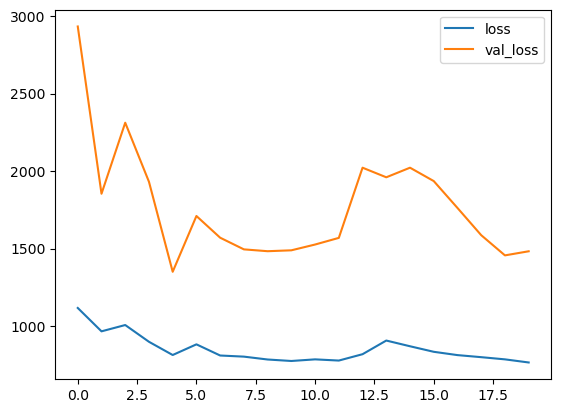

In [247]:
metric = pd.DataFrame(dnn_model.history.history)
metric.plot()

In [251]:
df_test['Pred'] = results

mae = round(mean_absolute_error(df_test['hourly_sum'], df_test['Pred']), 3)

plt.figure(figsize=(20,8))

df_test['hourly_sum'].plot(label='Actual')
df_test['Pred'].plot(label='Predicted')
plt.text(16770, 3250, 'MAE: {}'.format(mae), fontsize=20, color='red')
plt.title('Testing Set Forecast', weight='bold', fontsize=25)
plt.legend()
plt.show()

NameError: name 'results' is not defined

In [252]:
window_size = 24

df_forecast = df_test[['Pred']][-24:]
last_date = df_forecast.index

for time in range(168): # 7 days ahead
    pred = dnn_model.predict(np.expand_dims(df_forecast[time:time + window_size], axis=-1)[np.newaxis])[0][0]
    df_forecast = df_forecast.append({'Pred':pred}, ignore_index=True)
    
date_index = pd.date_range('2018-08-02 01:00:00', periods=192, freq='H') # 24+168
df_forecast.set_index(date_index, inplace=True)

KeyError: "None of [Index(['Pred'], dtype='object')] are in the [columns]"

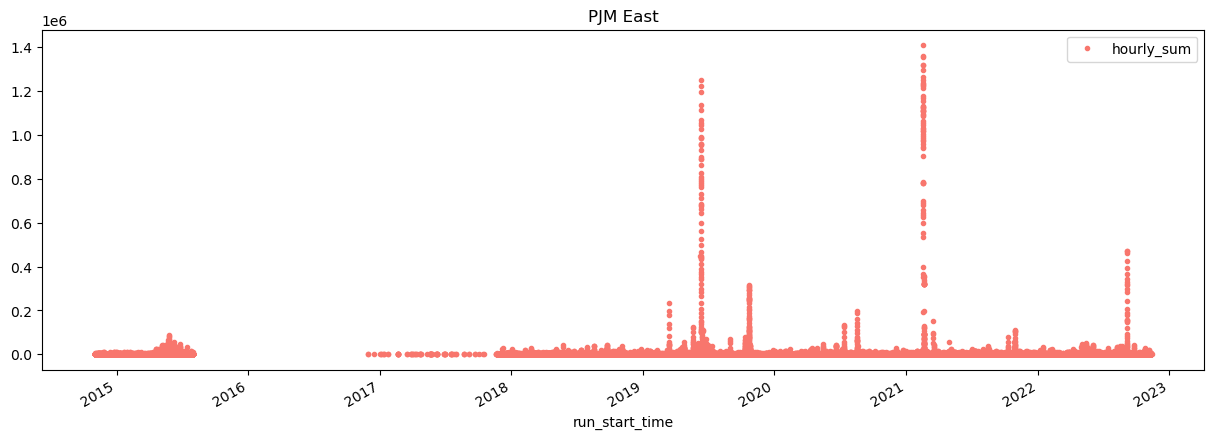

In [253]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East')

In [254]:
split_date = '01-Jan-2021'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

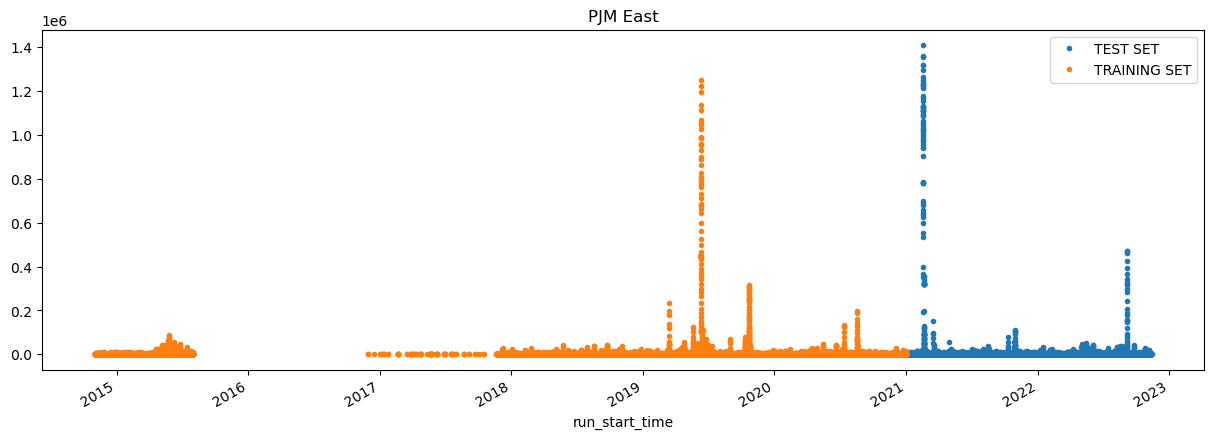

In [256]:
_ = df_test \
    .rename(columns={'hourly_sum': 'TEST SET'}) \
    .join(df_train.rename(columns={'hourly_sum': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='PJM East', style='.')

In [257]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [258]:
X_train, y_train = create_features(df_train, label='hourly_sum')
X_test, y_test = create_features(df_test, label='hourly_sum')


C:\Users\halee\AppData\Local\Temp\ipykernel_22748\256030966.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear
C:\Users\halee\AppData\Local\Temp\ipykernel_22748\256030966.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [260]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [261]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

C:\Users\halee\anaconda\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

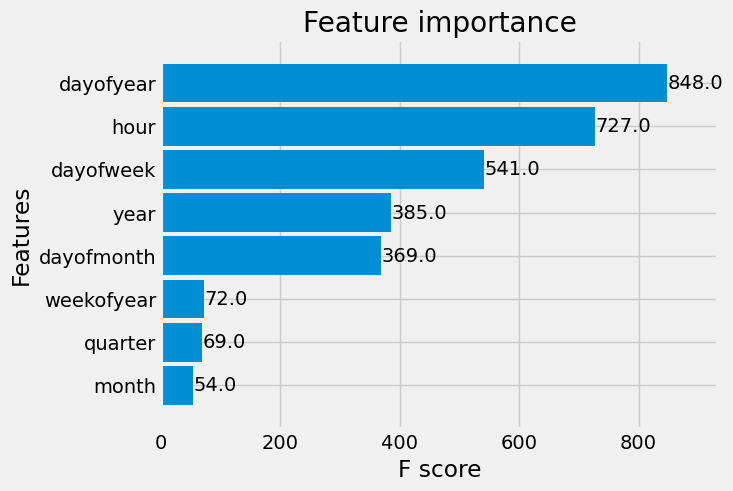

In [262]:
_ = plot_importance(reg, height=0.9)

In [264]:
df_test['MW_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

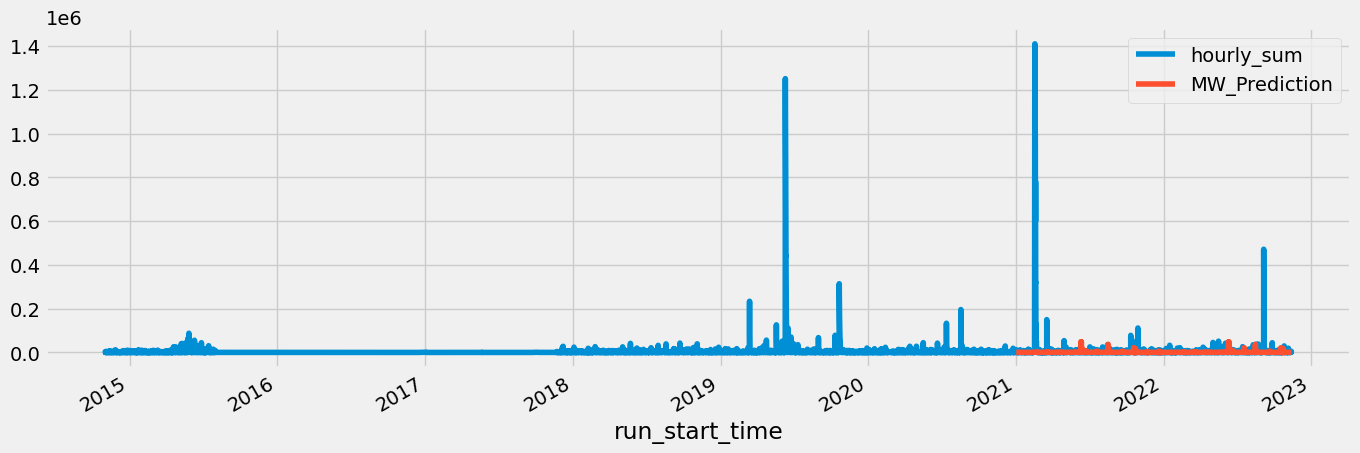

In [266]:
_ = df_all[['hourly_sum','MW_Prediction']].plot(figsize=(15, 5))

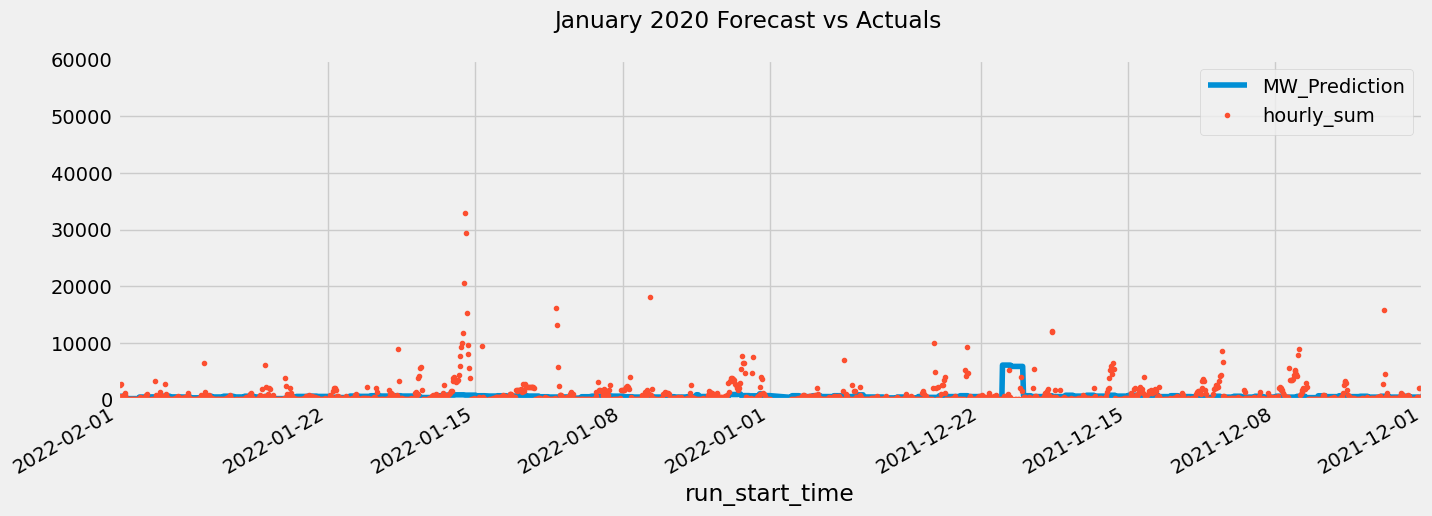

In [278]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['MW_Prediction','hourly_sum']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='12-01-2021', upper='02-01-2022')
ax.set_ylim(0, 60000)
plot = plt.suptitle('January 2020 Forecast vs Actuals')

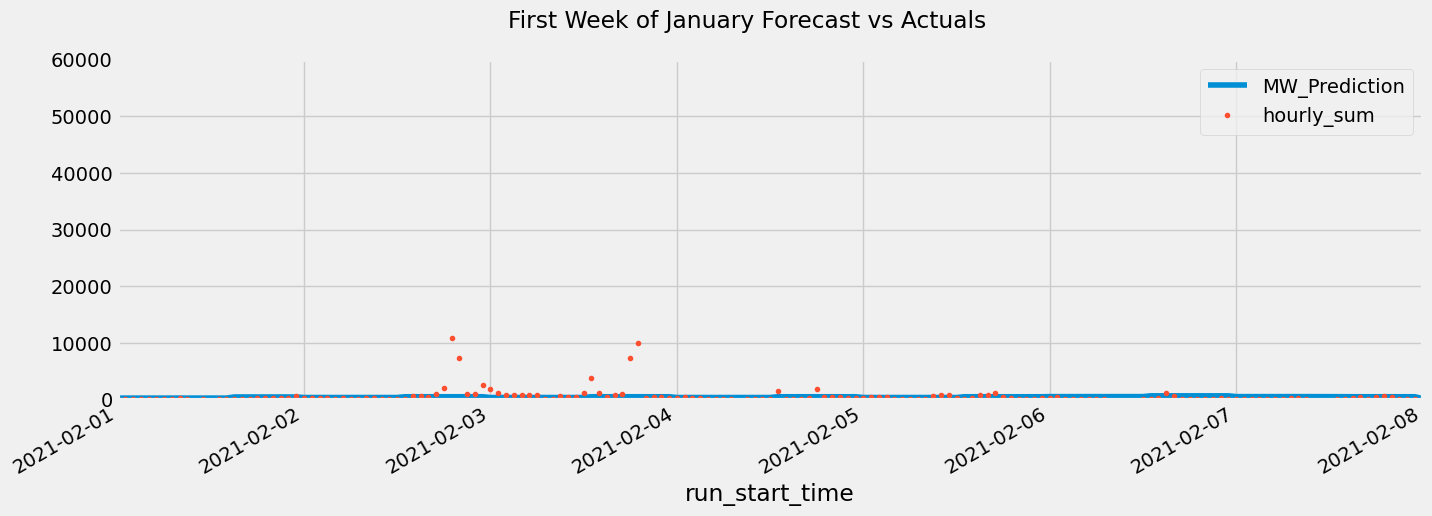

In [281]:
# Ocak Ayı ilk hafta Tahminlenen ve Gerçekleşen verileri çizelim
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['MW_Prediction','hourly_sum']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='02-01-2021', upper='02-08-2021')
ax.set_ylim(0, 60000)
plot = plt.suptitle('First Week of January Forecast vs Actuals')

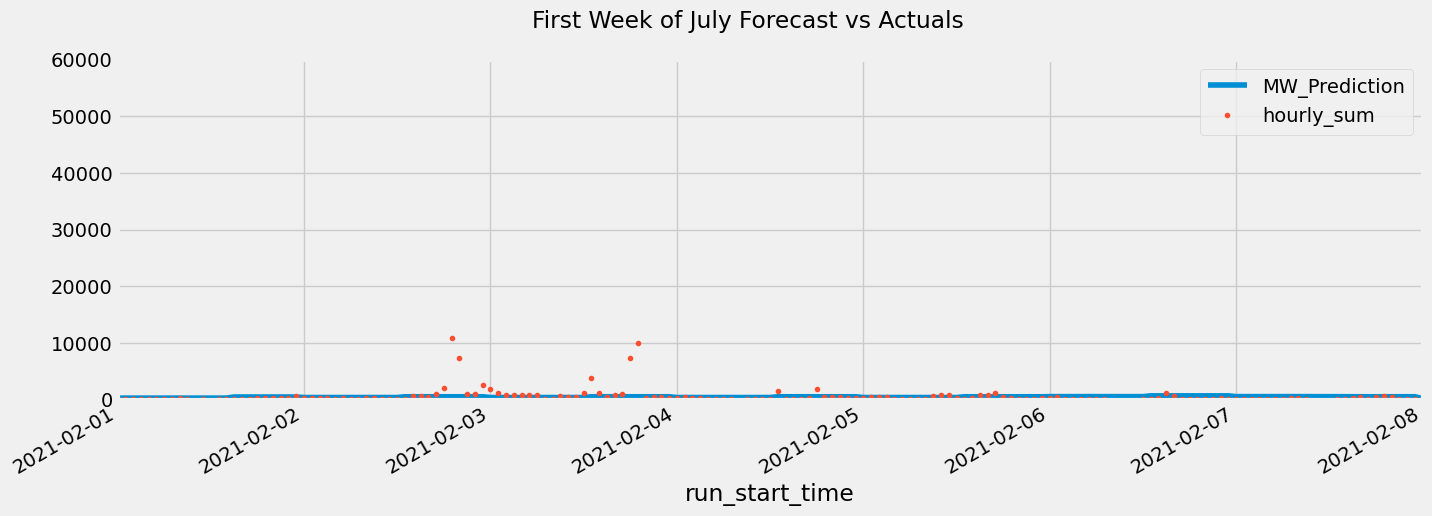

In [286]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['MW_Prediction','hourly_sum']].plot(ax=ax,
                                              style=['-','.'])
ax.set_ylim(0, 60000)
ax.set_xbound(lower='02-01-2021', upper='02-08-2021')
plot = plt.suptitle('First Week of July Forecast vs Actuals')

In [287]:
mean_squared_error(y_true=df_test['hourly_sum'],
                   y_pred=df_test['MW_Prediction'])

4071432881.590859

In [288]:
mean_absolute_error(y_true=df_test['hourly_sum'],
                   y_pred=df_test['MW_Prediction'])

6098.156717421014

In [289]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [290]:
mean_absolute_percentage_error(y_true=df_test['hourly_sum'],
                   y_pred=df_test['MW_Prediction'])

C:\Users\halee\AppData\Local\Temp\ipykernel_22748\1542411197.py:4: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


inf

In [291]:
df_test['error'] = df_test['hourly_sum'] - df_test['MW_Prediction']
df_test['abs_error'] = df_test['error'].apply(np.abs)
error_by_day = df_test.groupby(['year','month','dayofmonth']) \
    .mean()[['hourly_sum','MW_Prediction','error','abs_error']]

C:\Users\halee\AppData\Local\Temp\ipykernel_22748\2126745422.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()[['hourly_sum','MW_Prediction','error','abs_error']]


In [292]:
# Tahmin edilen günler
error_by_day.sort_values('error', ascending=True).head(10)

hourly_sum  MW_Prediction         error     abs_error
year month dayofmonth                                                        
2021 10    18           379.833333   21391.402344 -21011.568685  21011.568685
2022 10    17           848.458333   21391.402344 -20542.943685  20542.943685
2021 8     16           414.833333   20630.144531 -20215.311198  20215.311198
2022 7     18          1514.875000   21390.437500 -19875.562500  19875.562500
     8     15          1464.708333   20630.144531 -19165.436198  19165.436198
2021 6     12          1243.583333   18648.980469 -17405.397135  17405.397135
     10    22           279.625000   17047.152344 -16767.527344  16767.527344
2022 10    22          1949.625000   17380.578125 -15430.953125  15430.953125
     6     12          3349.375000   18648.980469 -15299.605469  15299.605469
2021 6     9            277.166667   10119.809570  -9842.643148   9842.643148

In [293]:
# En kötü mutlak hata tahminlenen günler
error_by_day.sort_values('abs_error', ascending=False).head(10)

hourly_sum  MW_Prediction         error     abs_error
year month dayofmonth                                                         
2021 2     16          1.170510e+06     590.582031  1.169919e+06  1.169919e+06
           17          7.087106e+05     590.582031  7.081200e+05  7.081200e+05
           15          6.342215e+05    1022.797363  6.331987e+05  6.331987e+05
2022 9     5           1.995953e+05     424.947876  1.991703e+05  1.991703e+05
2021 2     18          1.860790e+05     590.582031  1.854884e+05  1.854884e+05
2022 9     4           7.672175e+04     722.543152  7.599921e+04  7.601355e+04
2021 2     19          6.077200e+04     590.582031  6.018142e+04  6.018142e+04
     3     17          2.863375e+04     594.524902  2.803923e+04  2.843491e+04
     10    28          2.571912e+04     699.726074  2.501940e+04  2.534580e+04
           29          2.450962e+04     553.188049  2.395644e+04  2.395644e+04

In [294]:
# En iyi tahmin edilen günler
error_by_day.sort_values('abs_error', ascending=True).head(10)

hourly_sum  MW_Prediction       error   abs_error
year month dayofmonth                                                   
2021 3     8           226.166667     273.397858  -47.231210  135.027228
     6     11          475.666667     546.874207  -71.207540  149.051885
     1     4           170.833333     322.992706 -152.159365  178.513054
2022 7     23          481.625000     500.825653  -19.200653  178.581413
2021 2     8           140.818182     282.838379 -142.020204  189.388590
2022 4     29          511.708333     519.784424   -8.076090  197.219808
     3     2           520.583333     412.866791  107.716555  205.851158
     9     9           527.250000     732.790344 -205.540405  213.742004
2021 3     30          353.875000     511.335602 -157.460602  217.376134
     10    20          167.625000     341.542572 -173.917572  218.070048

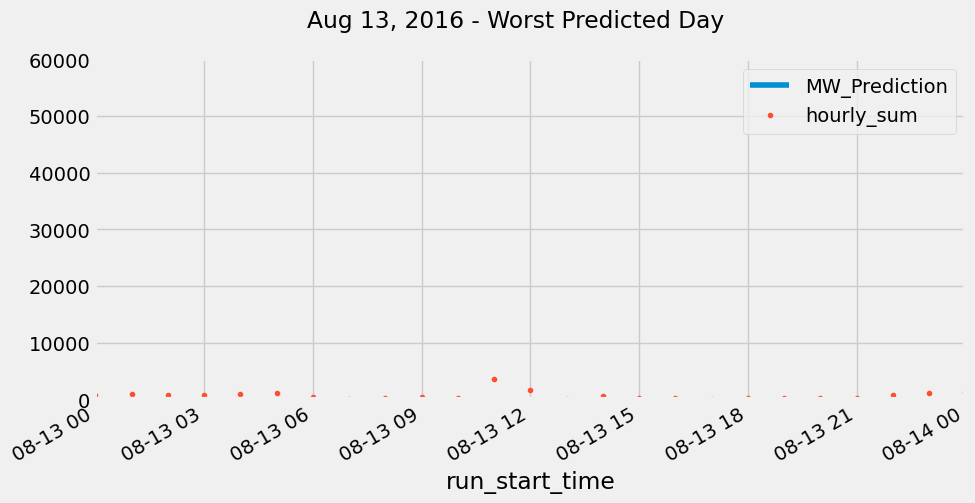

In [296]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_all[['MW_Prediction','hourly_sum']].plot(ax=ax,
                                              style=['-','.'])
ax.set_ylim(0, 60000)
ax.set_xbound(lower='08-13-2019', upper='08-14-2019')
plot = plt.suptitle('Aug 13, 2016 - Worst Predicted Day')

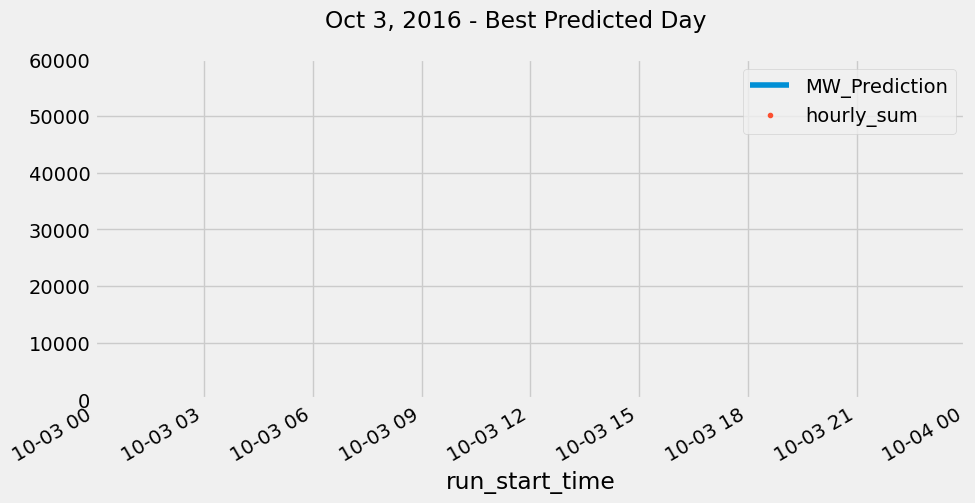

In [297]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_all[['MW_Prediction','hourly_sum']].plot(ax=ax,
                                              style=['-','.'])
ax.set_ylim(0, 60000)
ax.set_xbound(lower='10-03-2016', upper='10-04-2016')
plot = plt.suptitle('Oct 3, 2016 - Best Predicted Day')

In [298]:
df

,hourly_sum
run_start_time,
2014-11-01 04:00:00,52.0
2014-11-01 05:00:00,54.0
2014-11-01 06:00:00,153.0
2014-11-01 07:00:00,480.0
2014-11-01 08:00:00,668.0
...,...
2022-11-12 14:00:00,557.0
2022-11-12 15:00:00,1117.0
2022-11-12 16:00:00,1068.0


In [299]:
df

,hourly_sum
run_start_time,
2014-11-01 04:00:00,52.0
2014-11-01 05:00:00,54.0
2014-11-01 06:00:00,153.0
2014-11-01 07:00:00,480.0
2014-11-01 08:00:00,668.0
...,...
2022-11-12 14:00:00,557.0
2022-11-12 15:00:00,1117.0
2022-11-12 16:00:00,1068.0
